In [2]:
# Import Required Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# List of seasons to download
seasons = ['2020-21', '2021-22', '2022-23', '2023-24','2024-25']

# Initialize an empty DataFrame to hold all the data
df_all_seasons = pd.DataFrame()

# Loop through each season, download the data, and append it to the DataFrame
for season in seasons:
    url = f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/{season}/gws/merged_gw.csv"
    df_season = pd.read_csv(url)
    
    # Add a column to identify the season
    df_season['season'] = season
    
    # Append the season's data to the full DataFrame
    df_all_seasons = pd.concat([df_all_seasons, df_season], ignore_index=True)

# Check the merged data
print(df_all_seasons.head())
print(df_all_seasons.info())

                 name position           team   xP  assists  bonus  bps  \
0      Aaron Connolly      FWD       Brighton  0.5        0      0   -3   
1     Aaron Cresswell      DEF       West Ham  2.1        0      0   11   
2          Aaron Mooy      MID       Brighton  0.0        0      0    0   
3      Aaron Ramsdale       GK  Sheffield Utd  2.5        0      0   12   
4  Abdoulaye Doucouré      MID        Everton  1.3        0      0   20   

   clean_sheets  creativity  element  ...  value  was_home  yellow_cards  GW  \
0             0         0.3       78  ...     55      True             0   1   
1             0        11.2      435  ...     50      True             0   1   
2             0         0.0       60  ...     50      True             0   1   
3             0         0.0      483  ...     50      True             0   1   
4             1        44.6      512  ...     55     False             0   1   

    season expected_assists  expected_goal_involvements  expected_go

In [3]:
# List of seasons to check
seasons = ['2020-21', '2021-22', '2022-23', '2023-24','2024-25']

# Dictionary to hold the columns of each season
columns_dict = {}

# Loop through each season to get the columns
for season in seasons:
    url = f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/{season}/gws/merged_gw.csv"
    df_season = pd.read_csv(url)
    
    # Store the columns for each season
    columns_dict[season] = df_season.columns

# Display the columns for each season
for season, columns in columns_dict.items():
    print(f"Season {season} Columns:\n{columns}\n")

# Identify missing columns by comparing all seasons
all_columns = set(columns_dict[seasons[0]])
for season in seasons[1:]:
    all_columns = all_columns.union(set(columns_dict[season]))

missing_columns = {}
for season in seasons:
    missing = all_columns.difference(set(columns_dict[season]))
    missing_columns[season] = missing

# Display missing columns for each season
for season, missing in missing_columns.items():
    if missing:
        print(f"Season {season} is missing columns: {missing}")
    else:
        print(f"Season {season} has all columns.")

Season 2020-21 Columns:
Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW'],
      dtype='object')

Season 2021-22 Columns:
Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_po

In [4]:
import pandas as pd
from sklearn.impute import KNNImputer

# Define the expected columns that need imputation
expected_cols = ['expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded']

# Select relevant features for KNN imputation, including the 'expected_*' columns and others
knn_features = ['goals_scored', 'assists', 'ict_index', 'influence', 'clean_sheets', 'goals_conceded'] + expected_cols

# Apply KNN imputer to fill missing values for the 'expected_*' columns based on other features
imputer = KNNImputer(n_neighbors=5)

# Perform KNN Imputation on the selected features
df_all_seasons[knn_features] = imputer.fit_transform(df_all_seasons[knn_features])

# Check the imputed data to ensure the missing values are filled in the 'expected_*' columns
print(df_all_seasons[expected_cols].isna().sum())

expected_goals                0
expected_assists              0
expected_goal_involvements    0
expected_goals_conceded       0
dtype: int64


In [5]:
# Step 3: Filter players from the 2024-25 season
players_in_2024_25 = df_all_seasons[df_all_seasons['season'] == '2024-25']['name'].unique()

# Filter the dataset to only include players who are in the 2024-25 season
df_filtered = df_all_seasons[df_all_seasons['name'].isin(players_in_2024_25)]

# Check the filtered dataset
print(df_filtered['season'].value_counts())

season
2023-24    17040
2022-23    14114
2021-22     8991
2020-21     7120
2024-25     2550
Name: count, dtype: int64


In [6]:
# Filter the data for the 2024-25 season
season_2024_25_data = df_all_seasons[df_all_seasons['season'] == '2024-25']

# Find unique player names for the 2024-25 season
unique_players_2024_25 = season_2024_25_data['name'].unique()

# Count the number of unique players
num_unique_players_2024_25 = len(unique_players_2024_25)

# Output the result
print(f"Number of unique players in 2024-25 season: {num_unique_players_2024_25}")
print("Sample of unique players in 2024-25 season:")
print(unique_players_2024_25[:10])  # Display first 10 unique players for reference

Number of unique players in 2024-25 season: 659
Sample of unique players in 2024-25 season:
['Alex Scott' 'Carlos Miguel dos Santos Pereira' 'Tomiyasu Takehiro'
 'Malcolm Ebiowei' 'Ben Brereton Díaz' 'Pau Torres' 'Joel Ward'
 'Will Lankshear' 'Hwang Hee-chan' 'Mikey Moore']


In [7]:
# Assume df_filtered is your dataset after the previous steps

# For the missing starts in 2020-21 and 2021-22
df_filtered['starts'] = df_filtered.apply(
    lambda row: 1 if row['minutes'] > 60 else 0 if row['season'] in ['2020-21', '2021-22'] else row['starts'],
    axis=1
)

C:\Users\syeds\AppData\Local\Temp\ipykernel_7180\1939611094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['starts'] = df_filtered.apply(


In [8]:
# For adjusting the 'value' column
df_filtered['value'] = df_filtered['value'] / 10

C:\Users\syeds\AppData\Local\Temp\ipykernel_7180\2570264596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['value'] = df_filtered['value'] / 10


In [9]:
# Get unique teams for each season
teams_per_season = df_filtered.groupby('season')['team'].unique()

# Display the teams for each season
for season, teams in teams_per_season.items():
    print(f"Season: {season}")
    print(teams)
    print("\n")

Season: 2020-21
['West Ham' 'Sheffield Utd' 'Everton' 'Wolves' 'Brighton' 'Southampton'
 'Liverpool' 'Fulham' 'Spurs' 'Arsenal' 'Chelsea' 'Newcastle' 'West Brom'
 'Leicester' 'Crystal Palace' 'Leeds' 'Man Utd' 'Burnley' 'Man City'
 'Aston Villa']


Season: 2021-22
['Southampton' 'Brighton' 'Wolves' 'Crystal Palace' 'Everton' 'Man City'
 'Aston Villa' 'Chelsea' 'Man Utd' 'West Ham' 'Liverpool' 'Leicester'
 'Norwich' 'Arsenal' 'Newcastle' 'Watford' 'Brentford' 'Spurs' 'Burnley'
 'Leeds']


Season: 2022-23
['Chelsea' 'Newcastle' 'Leicester' "Nott'm Forest" 'Crystal Palace'
 'Wolves' 'Spurs' 'Liverpool' 'Brighton' 'Fulham' 'Man City' 'Southampton'
 'Man Utd' 'Brentford' 'Leeds' 'Bournemouth' 'Everton' 'Aston Villa'
 'Arsenal' 'West Ham']


Season: 2023-24
['Brighton' 'Man Utd' 'Brentford' 'Man City' 'Newcastle' 'Wolves'
 'Liverpool' 'Chelsea' 'Spurs' 'Aston Villa' "Nott'm Forest" 'Burnley'
 'Arsenal' 'Crystal Palace' 'Bournemouth' 'West Ham' 'Everton' 'Fulham'
 'Sheffield Utd' 'Luton']


S

In [10]:
# Get unique teams for each season
teams_per_season = df_filtered.groupby('season')['team'].unique()

# Initialize an empty dictionary to hold mappings for each season
opponent_mappings = {}

# Loop through each season, sort the teams alphabetically, and create a mapping
for season, teams in teams_per_season.items():
    # Sort teams alphabetically
    sorted_teams = sorted(teams)
    
    # Create a dictionary where keys are numbers (1 to 20) and values are the sorted team names
    mapping = {i+1: sorted_teams[i] for i in range(len(sorted_teams))}
    
    # Add the mapping to the opponent_mappings dictionary for the current season
    opponent_mappings[season] = mapping

# Display the mappings for each season
for season, mapping in opponent_mappings.items():
    print(f"Opponent Mapping for {season}:")
    print(mapping)
    print("\n")

Opponent Mapping for 2020-21:
{1: 'Arsenal', 2: 'Aston Villa', 3: 'Brighton', 4: 'Burnley', 5: 'Chelsea', 6: 'Crystal Palace', 7: 'Everton', 8: 'Fulham', 9: 'Leeds', 10: 'Leicester', 11: 'Liverpool', 12: 'Man City', 13: 'Man Utd', 14: 'Newcastle', 15: 'Sheffield Utd', 16: 'Southampton', 17: 'Spurs', 18: 'West Brom', 19: 'West Ham', 20: 'Wolves'}


Opponent Mapping for 2021-22:
{1: 'Arsenal', 2: 'Aston Villa', 3: 'Brentford', 4: 'Brighton', 5: 'Burnley', 6: 'Chelsea', 7: 'Crystal Palace', 8: 'Everton', 9: 'Leeds', 10: 'Leicester', 11: 'Liverpool', 12: 'Man City', 13: 'Man Utd', 14: 'Newcastle', 15: 'Norwich', 16: 'Southampton', 17: 'Spurs', 18: 'Watford', 19: 'West Ham', 20: 'Wolves'}


Opponent Mapping for 2022-23:
{1: 'Arsenal', 2: 'Aston Villa', 3: 'Bournemouth', 4: 'Brentford', 5: 'Brighton', 6: 'Chelsea', 7: 'Crystal Palace', 8: 'Everton', 9: 'Fulham', 10: 'Leeds', 11: 'Leicester', 12: 'Liverpool', 13: 'Man City', 14: 'Man Utd', 15: 'Newcastle', 16: "Nott'm Forest", 17: 'Southampto

In [11]:
import unidecode
from fuzzywuzzy import process

# Step 1: Function to standardize names (lowercase, remove special characters, handle accents)
def standardize_name(name):
    name = unidecode.unidecode(name)  # Remove accents/diacritics
    name = name.lower()  # Convert to lowercase
    name = name.replace("'", "")  # Remove apostrophes
    name = name.replace("-", " ")  # Replace hyphens with spaces
    return name

# Step 2: Apply standardization to names in both datasets
season_2024_25_data['standardized_name'] = season_2024_25_data['name'].apply(standardize_name)
df_all_seasons['standardized_name'] = df_all_seasons['name'].apply(standardize_name)

# Step 3: Fuzzy match remaining unmatched players based on standardized names
def fuzzy_match_standardized(unmatched_players, df_all_seasons):
    fuzzy_matches = {}
    for player in unmatched_players:
        standardized_player = standardize_name(player)  # Standardize the player's name
        # Fuzzy match against the standardized names in previous seasons
        match = process.extractOne(standardized_player, df_all_seasons['standardized_name'], scorer=fuzz.token_sort_ratio)
        
        # Only consider as a match if the similarity score is above a threshold (e.g., 80)
        if match and match[1] >= 80:
            similar_name = df_all_seasons[df_all_seasons['standardized_name'] == match[0]]['name'].values[0]
            fuzzy_matches[player] = {
                'similar_name': similar_name,
                'score': match[1]
            }
    
    return fuzzy_matches

# Step 4: Run fuzzy matching on remaining unmatched players
fuzzy_matches_standardized = fuzzy_match_standardized(remaining_unmatched_players_after_rename, df_all_seasons)

# Output the results
print(f"Number of fuzzy matched players after standardizing names: {len(fuzzy_matches_standardized)}")
print("Fuzzy matched players (after standardizing names):")
for original_name, match_info in fuzzy_matches_standardized.items():
    print(f"{original_name} -> {match_info['similar_name']} (Score: {match_info['score']})")

# Step 5: Identify players who remain unmatched after the standardization process
remaining_unmatched_after_standardization = [
    player for player in remaining_unmatched_players_after_rename if player not in fuzzy_matches_standardized
]

# Output the remaining unmatched players after standardization
print(f"Number of remaining unmatched players after standardization: {len(remaining_unmatched_after_standardization)}")
print("Remaining unmatched players (after standardization, need manual review):")
print(remaining_unmatched_after_standardization)

C:\Users\syeds\AppData\Local\Temp\ipykernel_7180\707999091.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_2024_25_data['standardized_name'] = season_2024_25_data['name'].apply(standardize_name)


NameError: name 'remaining_unmatched_players_after_rename' is not defined

In [12]:
# Step 1: Rename players in 2024-25 data based on fuzzy matches
fuzzy_matches_to_rename = {
    'Tomiyasu Takehiro': 'Takehiro Tomiyasu',
    'Ben Brereton Díaz': 'Ben Brereton',
    'Mitoma Kaoru': 'Kaoru Mitoma',
    'Yunus Emre Konak': 'Yunus Konak',
    "Rodrigo 'Rodri' Hernandez": 'Rodrigo Hernandez',
    'João Cavaco Cancelo': 'João Pedro Cavaco Cancelo',
    'Radu Drăgușin': 'Radu Dragusin',
    'Ismaïla Sarr': 'Ismaila Sarr',
    'Séamus Coleman': 'Seamus Coleman',
    'Yehor Yarmoliuk': 'Yegor Yarmoliuk',
    'Jaden Philogene': 'Jaden Philogene-Bidace',
    'Álex Moreno Lopera': 'Alexandre Moreno Lopera',
    'Josh King': 'Joshua King',
    'Wanya Marçal-Madivádua': 'Wanya Marçal-Madivadua',
    'Omari Giraud-Hutchinson': 'Omari Hutchinson',
    'Joe Lumley': 'Joe Lolley',
    'Kim Ji-soo': 'Ji-Soo Kim',
    'Łukasz Fabiański': 'Lukasz Fabianski',
    'Endo Wataru': 'Wataru Endo',
    'Martin Dúbravka': 'Martin Dubravka',
    'Saša Kalajdžić': 'Sasa Kalajdzic',
    'Tom Cannon': 'Thomas Cannon',
    'Asmir Begovic': 'Asmir Begović'
}

# Rename the players in the 2024-25 season data
season_2024_25_data['name'] = season_2024_25_data['name'].replace(fuzzy_matches_to_rename)

C:\Users\syeds\AppData\Local\Temp\ipykernel_7180\4202231127.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_2024_25_data['name'] = season_2024_25_data['name'].replace(fuzzy_matches_to_rename)


In [13]:
import pandas as pd

# Assuming df_all_seasons is the dataframe containing all the seasons' data

# Step 1: List of unmatched players (those to be removed)
unmatched_players = ['Carlos Miguel dos Santos Pereira', 'Will Lankshear', 'Alex Paulsen', 'Adrian Mazilu', 
                     'Carl Rushworth', 'Wes Burns', 'George Edmundson', "Sávio 'Savinho' Moreira de Oliveira", 
                     'Brajan Gruda', 'Miodrag Pivaš', 'Harry Clarke', 'Ryan Manning', 'Lucas Bergvall', 
                     'Lino da Cruz Sousa', 'Mads Hermansen', 'Guido Rodríguez', 'Will Alves', 'Sugawara Yukinari', 
                     'Kosta Nedeljković', 'Nikola Milenković', 'Mats Wieffer', 'Massimo Luongo', 'George Hirst', 
                     'Igor Thiago Nascimento Rodrigues', 'Rodrigo Martins Gomes', 'Noussair Mazraoui', 
                     'Elkan Baggott', 'Caleb Wiley', 'Dominic Solanke-Mitchell', 'Joshua Zirkzee', 'Stephy Mavididi', 
                     'Jørgen Strand Larsen', 'Riccardo Calafiori', 'Joe Aribo', 'Matthijs de Ligt', 'Andy Irving', 
                     'Chadi Riad Dnanou', 'Freddie Ladapo', 'Luke Woolfenden', 'João Pedro Ferreira Silva', 
                     'Michael Golding', 'Ross Stewart', 'Yankuba Minteh', 'Ronnie Edwards', 'Marcus Myers-Harness', 
                     'Jack Taylor', 'Eric da Silva Moreira', 'Luis Guilherme Lira dos Santos', 'Harrison Armstrong', 
                     'Leny Yoro', 'Stefan Bajčetić Maquieira', 'Enzo Barrenechea', 'Caleb Okoli', 'Daichi Kamada', 
                     'Conor Chaplin', 'Corrie Ndaba', 'Pedro Cardoso de Lima', 'Jesper Lindstrøm', 'Filip Jørgensen', 
                     'Sam Morsy', 'Marc Guiu Paz', 'Jean-Clair Todibo', 'Jorge Cuenca Barreno', 'Julián Araujo Zúñiga', 
                     'Sam Szmodics', 'Jakub Stolarczyk', 'Dean Huijsen', 'Ibrahim Osman', 'Nathan Wood-Gordon', 
                     'Cameron Burgess', 'Abdul Fatawu', 'Niclas Füllkrug', 'Renato Palma Veiga', 'Samuel Iling-Junior', 
                     'Ali Al-Hamadi', 'Cameron Humphreys', 'Roman Dixon', 'Jens Cajuste', 
                     'Francisco Evanilson de Lima Barbosa', 'Mateus Gonçalo Espanha Fernandes', 'Ramón Sosa']

# Step 2: Filter players from the 2024-25 season
players_in_2024_25 = df_all_seasons[df_all_seasons['season'] == '2024-25']['name'].unique()

# Step 3: Filter the dataset to only include players who are in the 2024-25 season
df_filtered = df_all_seasons[df_all_seasons['name'].isin(players_in_2024_25)]

# Step 4: Remove unmatched players from the dataset (those provided in the unmatched list)
df_filtered = df_filtered[~df_filtered['name'].isin(unmatched_players)]

# Step 5: Check the filtered dataset
print(df_filtered['season'].value_counts())

# Step 6: Save the final filtered dataset to an Excel file
output_file = "filtered_players_2024_25_season1.xlsx"
df_filtered.to_excel(output_file, index=False)
print(f"Filtered data saved to {output_file}")

season
2023-24    17040
2022-23    14114
2021-22     8991
2020-21     7120
2024-25     2231
Name: count, dtype: int64
Filtered data saved to filtered_players_2024_25_season1.xlsx


In [14]:
import pandas as pd

# Load the existing filtered file
df_filtered = pd.read_excel("filtered_players_2024_25_season1.xlsx")

# Step 1: Update the 'starts' column for seasons 2020-21 and 2021-22
df_filtered['starts'] = df_filtered.apply(
    lambda row: 1 if row['minutes'] > 60 else 0 if row['season'] in ['2020-21', '2021-22'] else row['starts'],
    axis=1
)

# Step 2: Format the 'value' column (dividing by 10 to get the desired format)
df_filtered['value'] = df_filtered['value'] / 10

# Step 3: Define opponent mappings for each season
opponent_mappings = {
    '2020-21': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Brighton', 4: 'Burnley', 5: 'Chelsea', 6: 'Crystal Palace', 
                7: 'Everton', 8: 'Fulham', 9: 'Leeds', 10: 'Leicester', 11: 'Liverpool', 12: 'Man City', 
                13: 'Man Utd', 14: 'Newcastle', 15: 'Sheffield Utd', 16: 'Southampton', 17: 'Spurs', 
                18: 'West Brom', 19: 'West Ham', 20: 'Wolves'},
    '2021-22': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Brentford', 4: 'Brighton', 5: 'Burnley', 6: 'Chelsea', 
                7: 'Crystal Palace', 8: 'Everton', 9: 'Leeds', 10: 'Leicester', 11: 'Liverpool', 12: 'Man City', 
                13: 'Man Utd', 14: 'Newcastle', 15: 'Norwich', 16: 'Southampton', 17: 'Spurs', 
                18: 'Watford', 19: 'West Ham', 20: 'Wolves'},
    '2022-23': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Bournemouth', 4: 'Brentford', 5: 'Brighton', 6: 'Chelsea', 
                7: 'Crystal Palace', 8: 'Everton', 9: 'Fulham', 10: 'Leeds', 11: 'Leicester', 12: 'Liverpool', 
                13: 'Man City', 14: 'Man Utd', 15: 'Newcastle', 16: "Nott'm Forest", 17: 'Southampton', 
                18: 'Spurs', 19: 'West Ham', 20: 'Wolves'},
    '2023-24': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Bournemouth', 4: 'Brentford', 5: 'Brighton', 6: 'Burnley', 
                7: 'Chelsea', 8: 'Crystal Palace', 9: 'Everton', 10: 'Fulham', 11: 'Liverpool', 12: 'Luton', 
                13: 'Man City', 14: 'Man Utd', 15: 'Newcastle', 16: "Nott'm Forest", 17: 'Sheffield Utd', 
                18: 'Spurs', 19: 'West Ham', 20: 'Wolves'},
    '2024-25': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Bournemouth', 4: 'Brentford', 5: 'Brighton', 6: 'Chelsea', 
                7: 'Crystal Palace', 8: 'Everton', 9: 'Fulham', 10: 'Ipswich', 11: 'Leicester', 12: 'Liverpool', 
                13: 'Man City', 14: 'Man Utd', 15: 'Newcastle', 16: "Nott'm Forest", 17: 'Southampton', 
                18: 'Spurs', 19: 'West Ham', 20: 'Wolves'}
}

# Team strength dictionaries for all seasons
team_strengths = {
    '2020-21': {
        'Man City': 5, 'Man Utd': 5, 'Liverpool': 4, 'Chelsea': 4, 'Fulham': 2, 'West Brom': 2, 'Sheffield Utd': 2, 
        'Brighton': 3, 'West Ham': 3, 'Everton': 3, 'Leeds': 3, 'Leicester': 3, 'Southampton': 3, 'Newcastle': 3, 
        'Arsenal': 3, 'Spurs': 3, 'Aston Villa': 3, 'Burnley': 3, 'Crystal Palace': 3, 'Wolves': 3
    },
    '2021-22': {
        'Man City': 5, 'Liverpool': 5, 'Chelsea': 4, 'Spurs': 4, 'Burnley': 2, 'Watford': 2, 'Norwich': 2,
        'Brighton': 3, 'West Ham': 3, 'Everton': 3, 'Leeds': 3, 'Leicester': 3, 'Southampton': 3, 'Newcastle': 3,
        'Arsenal': 3, 'Man Utd': 3, 'Aston Villa': 3, 'Brentford': 3, 'Crystal Palace': 3, 'Wolves': 3
    },
    '2022-23': {
        'Man City': 5, 'Arsenal': 5, 'Man Utd': 4, 'Newcastle': 4, 'Leicester': 2, 'Leeds': 2, 'Southampton': 2,
        'Brighton': 3, 'West Ham': 3, 'Everton': 3, 'Chelsea': 3, 'Liverpool': 3, 'Aston Villa': 3, 'Brentford': 3,
        'Crystal Palace': 3, 'Spurs': 3, 'Wolves': 3, 'Nottingham Forest': 3, 'Fulham': 3, 'Bournemouth': 3
    },
    '2023-24': {
        'Man City': 5, 'Arsenal': 5, 'Liverpool': 5, 'Aston Villa': 5, 'Luton': 2, 'Burnley': 2, 'Sheffield Utd': 2,
        'Brighton': 3, 'West Ham': 3, 'Everton': 3, 'Chelsea': 3, 'Man Utd': 3, 'Newcastle': 3, 'Brentford': 3,
        'Crystal Palace': 3, 'Spurs': 3, 'Wolves': 3, 'Bournemouth': 3, 'Nottingham Forest': 3, 'Fulham': 3
    },
    '2024-25': {
        'Man City': 5, 'Arsenal': 5, 'Liverpool': 5, 'Aston Villa': 5, 'Bournemouth': 2, 'Southampton': 2,
        'Ipswich Utd': 2, 'Brighton': 3, 'West Ham': 3, 'Everton': 3, 'Chelsea': 3, 'Man Utd': 3, 'Newcastle': 3,
        'Brentford': 3, 'Crystal Palace': 3, 'Spurs': 3, 'Wolves': 3, 'Nottingham Forest': 3, 'Fulham': 3
    }
}

# Function to calculate relative fixture difficulty
def calculate_fixture_difficulty(row):
    season = row['season']
    opponent_number = row['opponent_team']
    
    # Map the opponent team number to team name
    opponent_team = opponent_mappings[season].get(opponent_number, 'Unknown')
    
    # Get the opponent's team strength
    opponent_strength = team_strengths[season].get(opponent_team, 3)  # Default to 3 if not found
    
    # Get the player's team strength (assuming we have a column 'team' in df_filtered)
    player_team = row['team']
    player_strength = team_strengths[season].get(player_team, 3)  # Default to 3 if not found
    
    # Calculate fixture difficulty as the difference in team strength
    return player_strength - opponent_strength

# Apply the fixture difficulty calculation
df_filtered['fixture_difficulty'] = df_filtered.apply(calculate_fixture_difficulty, axis=1)

In [17]:
# Save the updated dataframe
output_file = "filtered_players_2024_25_season1.xlsx"
df_filtered.to_excel(output_file, index=False)

print(f"Updated data saved to {output_file}")

Updated data saved to filtered_players_2024_25_season1.xlsx


In [18]:
import pandas as pd

# Load the existing filtered file
df_filtered = pd.read_excel("filtered_players_2024_25_season1.xlsx")

# Step 1: Define opponent mappings for each season
opponent_mappings = {
    '2020-21': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Brighton', 4: 'Burnley', 5: 'Chelsea', 6: 'Crystal Palace', 
                7: 'Everton', 8: 'Fulham', 9: 'Leeds', 10: 'Leicester', 11: 'Liverpool', 12: 'Man City', 
                13: 'Man Utd', 14: 'Newcastle', 15: 'Sheffield Utd', 16: 'Southampton', 17: 'Spurs', 
                18: 'West Brom', 19: 'West Ham', 20: 'Wolves'},
    '2021-22': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Brentford', 4: 'Brighton', 5: 'Burnley', 6: 'Chelsea', 
                7: 'Crystal Palace', 8: 'Everton', 9: 'Leeds', 10: 'Leicester', 11: 'Liverpool', 12: 'Man City', 
                13: 'Man Utd', 14: 'Newcastle', 15: 'Norwich', 16: 'Southampton', 17: 'Spurs', 
                18: 'Watford', 19: 'West Ham', 20: 'Wolves'},
    '2022-23': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Bournemouth', 4: 'Brentford', 5: 'Brighton', 6: 'Chelsea', 
                7: 'Crystal Palace', 8: 'Everton', 9: 'Fulham', 10: 'Leeds', 11: 'Leicester', 12: 'Liverpool', 
                13: 'Man City', 14: 'Man Utd', 15: 'Newcastle', 16: "Nott'm Forest", 17: 'Southampton', 
                18: 'Spurs', 19: 'West Ham', 20: 'Wolves'},
    '2023-24': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Bournemouth', 4: 'Brentford', 5: 'Brighton', 6: 'Burnley', 
                7: 'Chelsea', 8: 'Crystal Palace', 9: 'Everton', 10: 'Fulham', 11: 'Liverpool', 12: 'Luton', 
                13: 'Man City', 14: 'Man Utd', 15: 'Newcastle', 16: "Nott'm Forest", 17: 'Sheffield Utd', 
                18: 'Spurs', 19: 'West Ham', 20: 'Wolves'},
    '2024-25': {1: 'Arsenal', 2: 'Aston Villa', 3: 'Bournemouth', 4: 'Brentford', 5: 'Brighton', 6: 'Chelsea', 
                7: 'Crystal Palace', 8: 'Everton', 9: 'Fulham', 10: 'Ipswich', 11: 'Leicester', 12: 'Liverpool', 
                13: 'Man City', 14: 'Man Utd', 15: 'Newcastle', 16: "Nott'm Forest", 17: 'Southampton', 
                18: 'Spurs', 19: 'West Ham', 20: 'Wolves'}
}

# Step 2: Function to map opponent team number to the team name
def map_opponent_team(row):
    season = row['season']
    opponent_number = row['opponent_team']
    # Return the team name based on the season mapping
    return opponent_mappings.get(season, {}).get(opponent_number, 'Unknown')

# Step 3: Map opponent team numbers to team names
df_filtered['opponent_team'] = df_filtered.apply(map_opponent_team, axis=1)

# Step 4: Drop the unnecessary columns 'elements', 'round', and 'fixture'
df_filtered.drop(columns=['element', 'round', 'fixture'], inplace=True)

# Save the updated dataframe
output_file = "filtered_players_2024_25_season1.xlsx"
df_filtered.to_excel(output_file, index=False)

print(f"Updated dataframe with mapped opponent team and removed columns saved to {output_file}")

Updated dataframe with mapped opponent team and removed columns saved to filtered_players_2024_25_season1.xlsx


Missing Values in the Dataset:
Series([], dtype: int64)


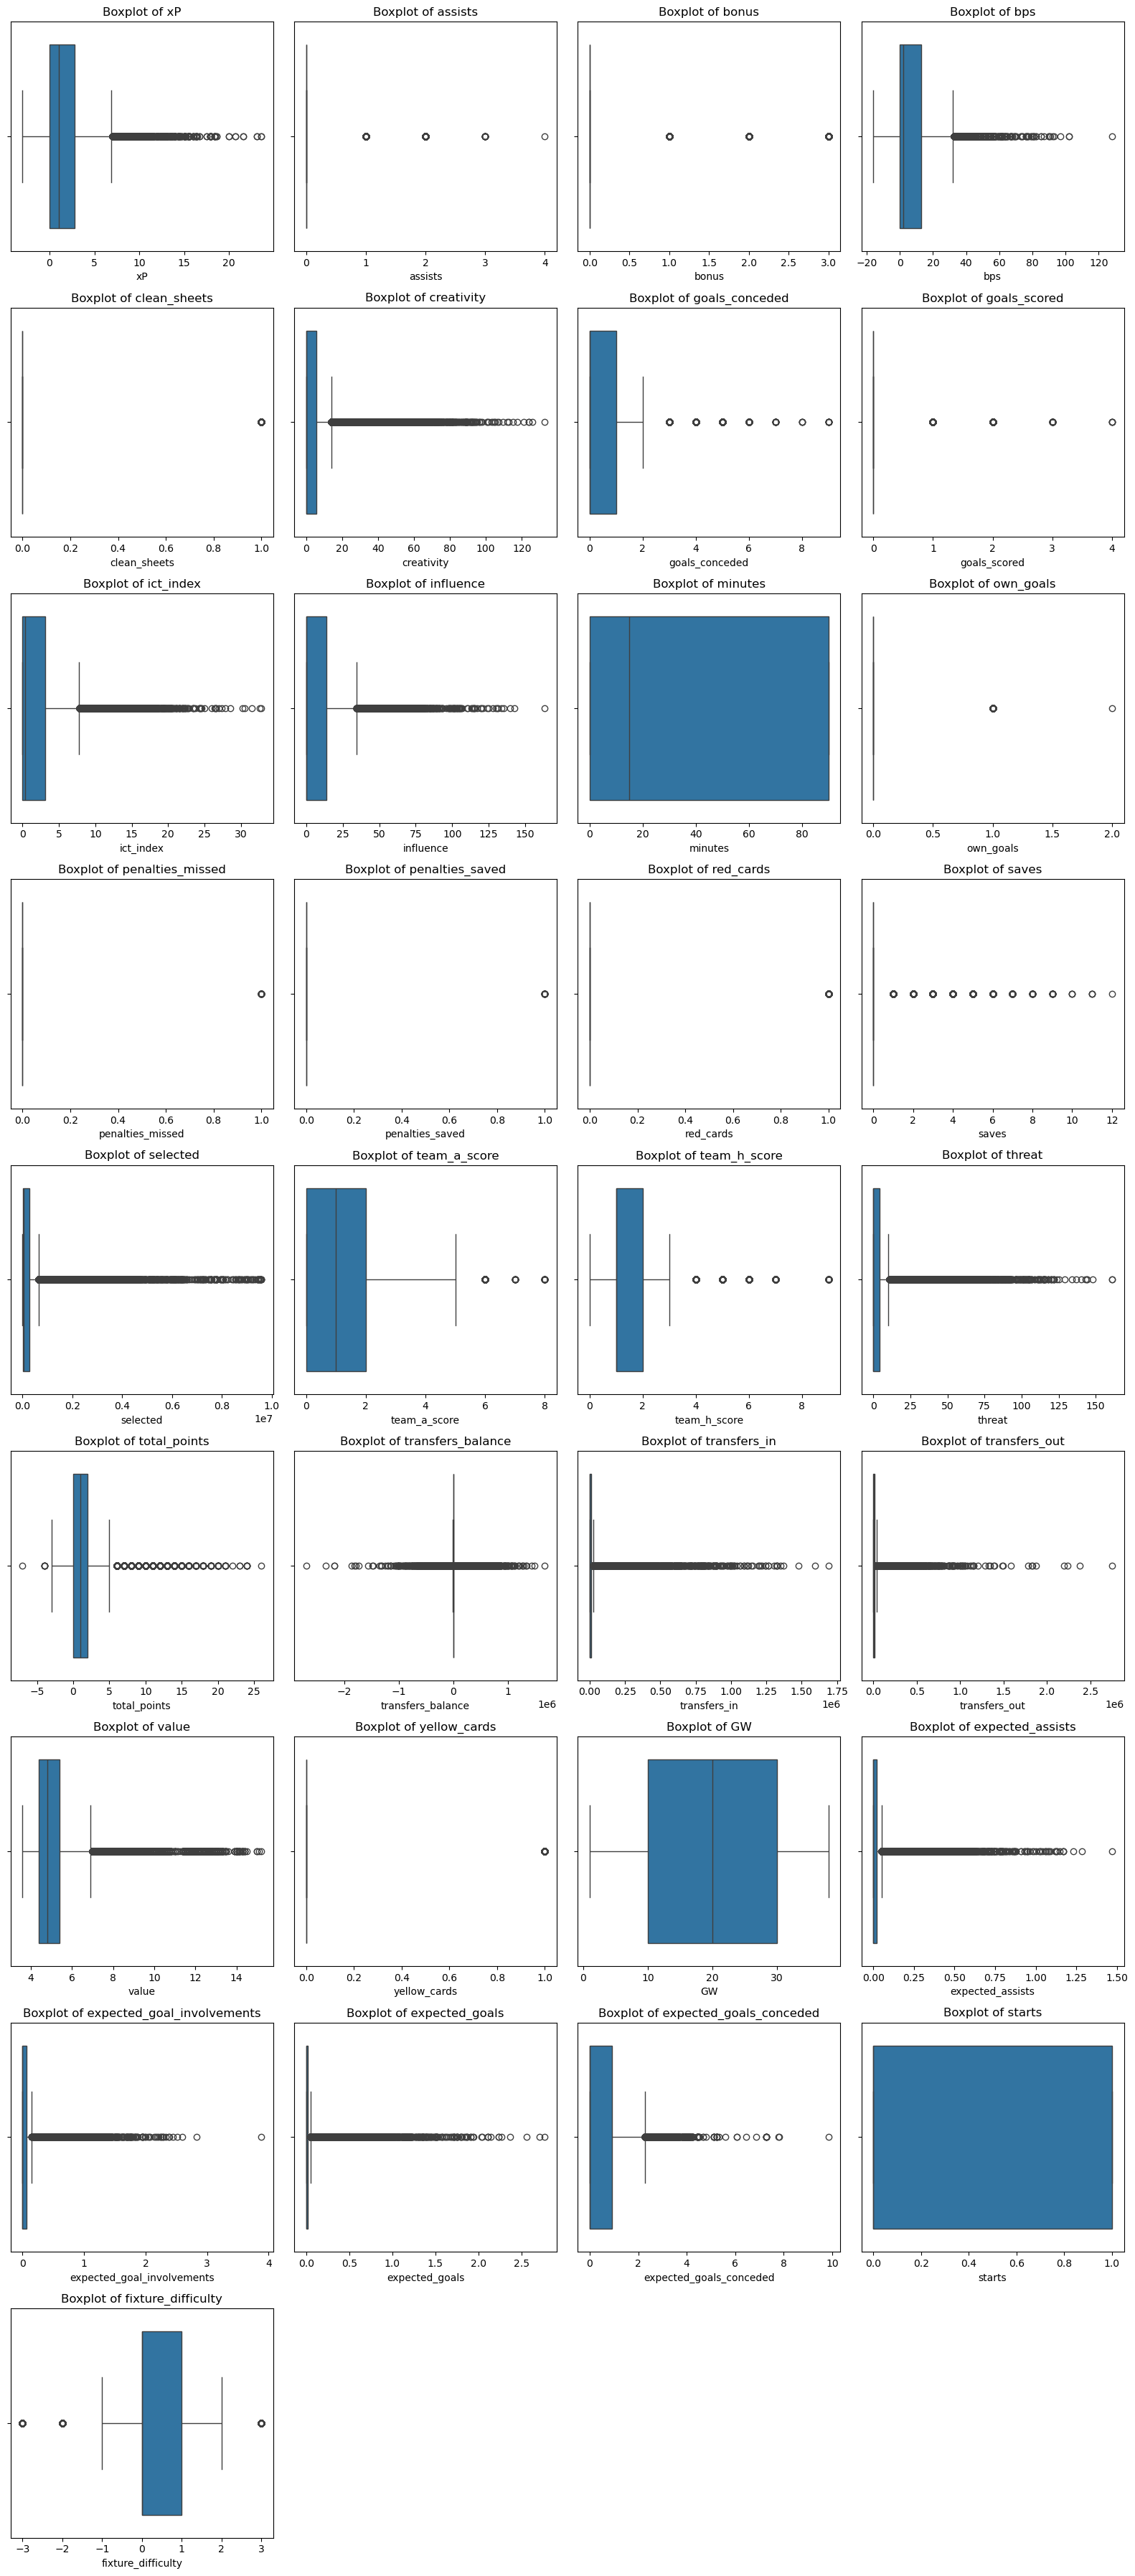


Summary Statistics:
                 xP       assists         bonus           bps  clean_sheets  \
count  49496.000000  49496.000000  49496.000000  49496.000000  49496.000000   
mean       1.785098      0.053338      0.137001      7.316854      0.124030   
std        2.343527      0.245834      0.550326     10.460397      0.329619   
min       -3.000000      0.000000      0.000000    -16.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      2.000000      0.000000   
75%        2.800000      0.000000      0.000000     13.000000      0.000000   
max       23.600000      4.000000      3.000000    128.000000      1.000000   

         creativity  goals_conceded  goals_scored     ict_index     influence  \
count  49496.000000    49496.000000  49496.000000  49496.000000  49496.000000   
mean       5.989785        0.605645      0.058207      2.086680      8.790848   
std       12.123908     

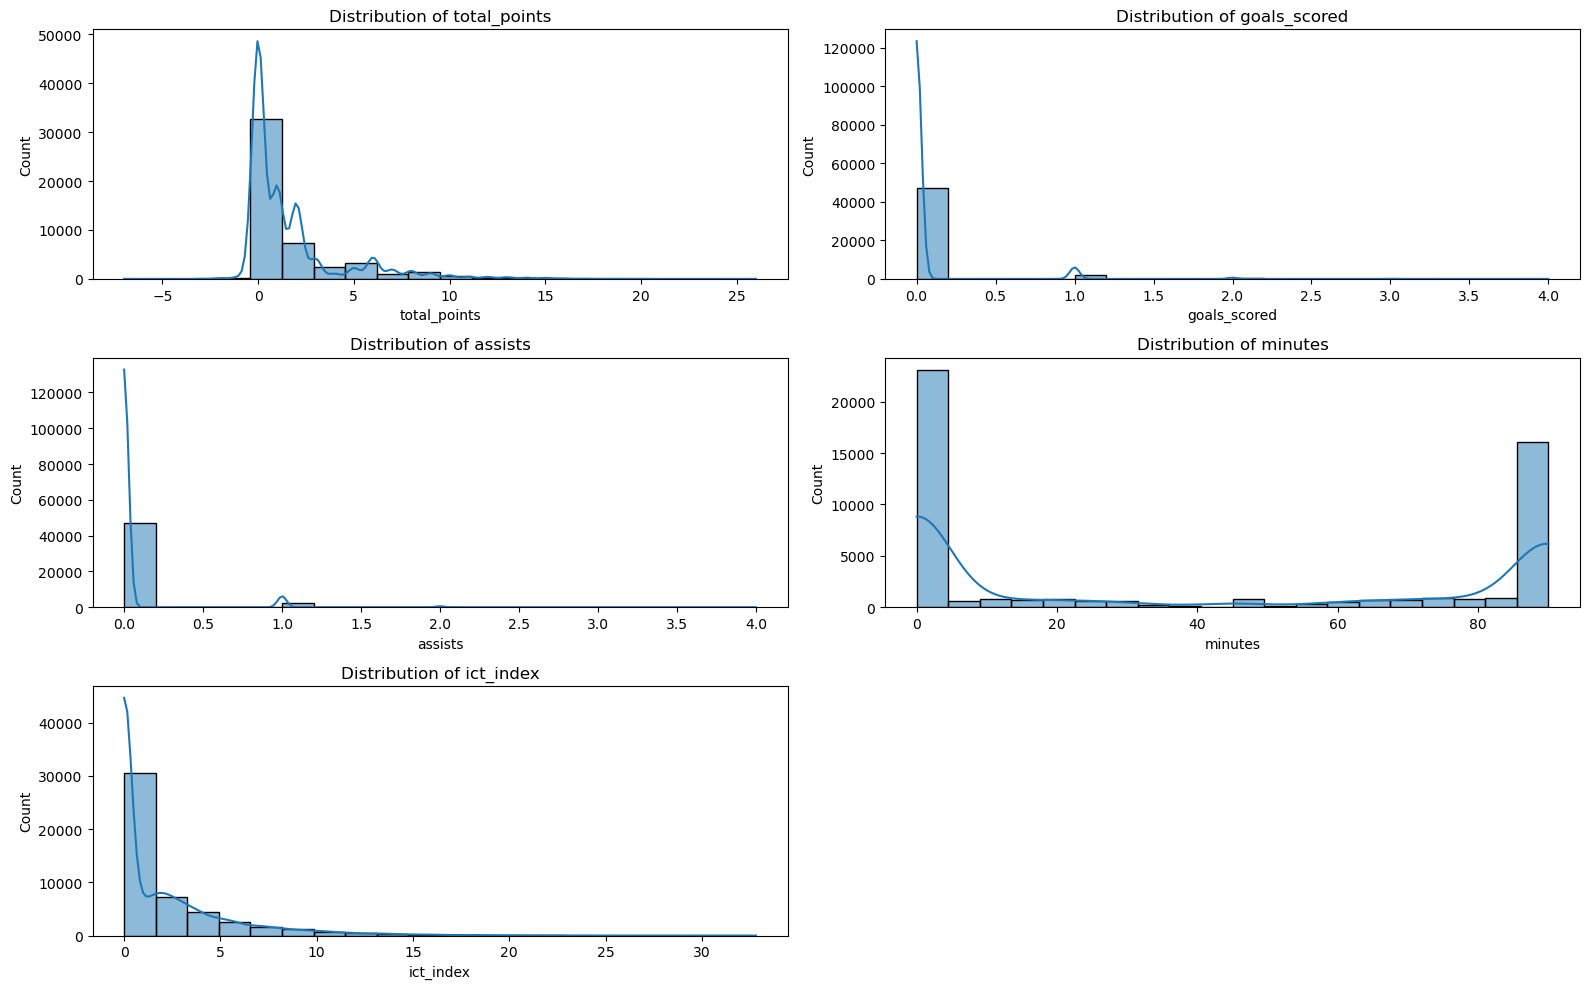

In [19]:
# Step 1: Check for missing values
missing_values = df_filtered.isnull().sum()
print("Missing Values in the Dataset:")
print(missing_values[missing_values > 0])

# Step 2: Identify any outliers using boxplots
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for the subplots
num_plots = len(numeric_columns)
num_cols = 4  # You can adjust this to fit more or fewer plots per row
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(16, num_rows * 4))  # Adjust figure size based on rows

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df_filtered, x=col)
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

# Step 3: Summary statistics of numeric columns
print("\nSummary Statistics:")
print(df_filtered.describe())

# Step 4: Plot distributions of key variables
plt.figure(figsize=(16, 10))
for i, col in enumerate(['total_points', 'goals_scored', 'assists', 'minutes', 'ict_index'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_filtered[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

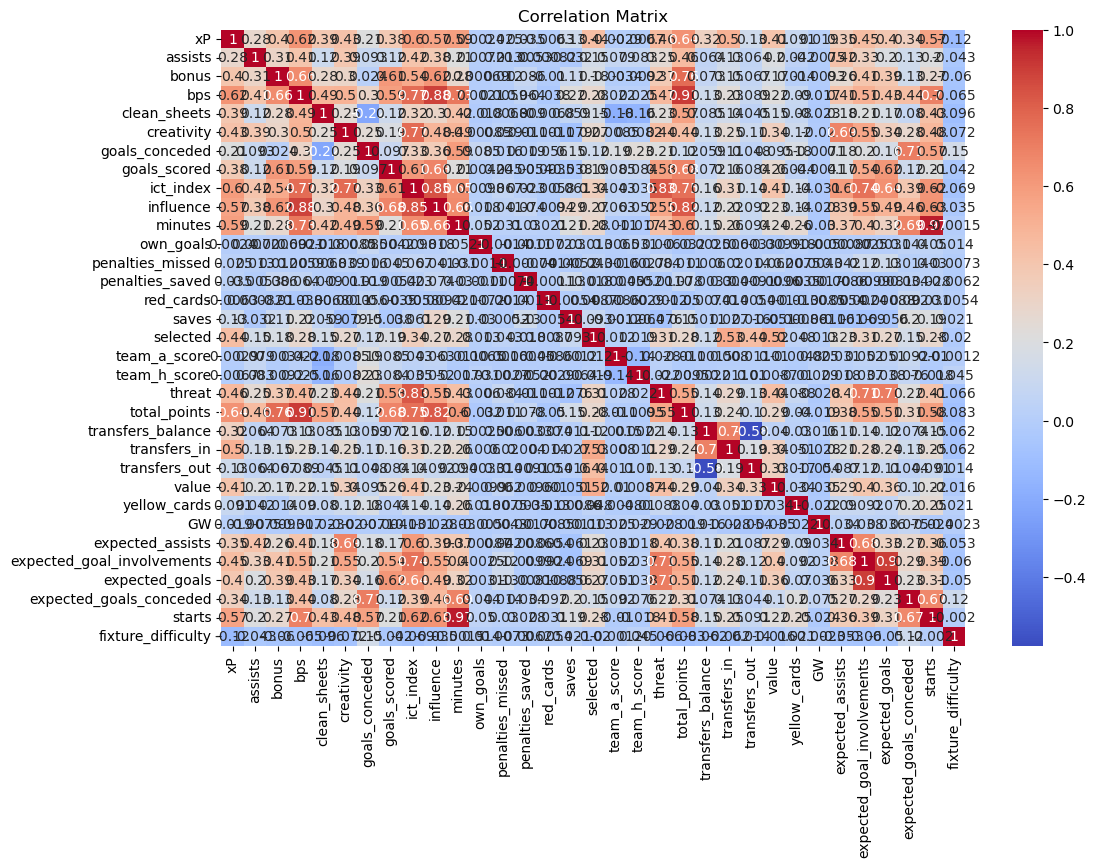


Highly Correlated Features (correlation > 0.80):
                                 bps  ict_index  influence   minutes  \
xP                               NaN        NaN        NaN       NaN   
assists                          NaN        NaN        NaN       NaN   
bonus                            NaN        NaN        NaN       NaN   
bps                              NaN        NaN   0.884912       NaN   
clean_sheets                     NaN        NaN        NaN       NaN   
creativity                       NaN        NaN        NaN       NaN   
goals_conceded                   NaN        NaN        NaN       NaN   
goals_scored                     NaN        NaN        NaN       NaN   
ict_index                        NaN        NaN   0.845079       NaN   
influence                   0.884912   0.845079        NaN       NaN   
minutes                          NaN        NaN        NaN       NaN   
own_goals                        NaN        NaN        NaN       NaN   
penalties_miss

In [175]:
# Step 3: Calculate the correlation matrix only for numeric columns
numeric_data = df_filtered[numeric_columns]  # Select only numeric columns
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 4: Display any highly correlated features
threshold = 0.80
highly_correlated_features = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1)].dropna(how='all', axis=1)
print("\nHighly Correlated Features (correlation > 0.80):")
print(highly_correlated_features)

In [20]:
# Step 1: Create separate dataframes for each player position
df_gk = df_filtered[df_filtered['position'] == 'GK']
df_def = df_filtered[df_filtered['position'] == 'DEF']
df_mid = df_filtered[df_filtered['position'] == 'MID']
df_fwd = df_filtered[df_filtered['position'] == 'FWD']

# Step 2: Check the size of each dataframe to ensure they are split correctly
print(f"Goalkeepers (GK): {df_gk.shape}")
print(f"Defenders (DEF): {df_def.shape}")
print(f"Midfielders (MID): {df_mid.shape}")
print(f"Forwards (FWD): {df_fwd.shape}")

# Step 3: Explore each dataframe (optional)
print(df_gk.head())  # View the first few rows of Goalkeepers' data
print(df_def.head())  # View the first few rows of Defenders' data
print(df_mid.head())  # View the first few rows of Midfielders' data
print(df_fwd.head())  # View the first few rows of Forwards' data

Goalkeepers (GK): (5172, 41)
Defenders (DEF): (17586, 41)
Midfielders (MID): (21110, 41)
Forwards (FWD): (5595, 41)
                     name position           team   xP  assists  bonus  bps  \
1          Aaron Ramsdale       GK  Sheffield Utd  2.5        0      0   12   
8           Alex McCarthy       GK    Southampton  1.8        0      0   17   
9   Alisson Ramses Becker       GK      Liverpool  5.5        0      0    9   
10        Alphonse Areola       GK         Fulham  0.8        0      0    0   
16             Bernd Leno       GK        Arsenal  3.5        0      1   29   

    clean_sheets  creativity  goals_conceded  ...  yellow_cards  GW   season  \
1              0         0.0               2  ...             0   1  2020-21   
8              0         0.0               1  ...             0   1  2020-21   
9              0         0.0               3  ...             0   1  2020-21   
10             0         0.0               0  ...             0   1  2020-21   
16       

In [61]:
df_gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5414 entries, 0 to 5413
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        5414 non-null   object 
 1   position                    5414 non-null   object 
 2   team                        5414 non-null   object 
 3   xP                          5414 non-null   float64
 4   assists                     5414 non-null   int64  
 5   bonus                       5414 non-null   int64  
 6   bps                         5414 non-null   int64  
 7   clean_sheets                5414 non-null   int64  
 8   creativity                  5414 non-null   float64
 9   goals_conceded              5414 non-null   int64  
 10  goals_scored                5414 non-null   int64  
 11  ict_index                   5414 non-null   float64
 12  influence                   5414 non-null   float64
 13  kickoff_time                5414 

In [22]:
# Save the updated dataframe
output_file = "df_def.xlsx"
df_def.to_excel(output_file, index=False)

print(f"Updated data saved to {output_file}")

Updated data saved to df_def.xlsx


In [23]:
# Save the updated dataframe
output_file = "df_mid.xlsx"
df_mid.to_excel(output_file, index=False)

print(f"Updated data saved to {output_file}")

Updated data saved to df_mid.xlsx


In [25]:
# Save the updated dataframe
output_file = "df_fwd.xlsx"
df_fwd.to_excel(output_file, index=False)

print(f"Updated data saved to {output_file}")

Updated data saved to df_fwd.xlsx


In [26]:
# Save the updated dataframe
output_file = "df_gk.xlsx"
df_gk.to_excel(output_file, index=False)

print(f"Updated data saved to {output_file}")

Updated data saved to df_gk.xlsx


In [98]:

# Load the dataset
file_path = 'C:/Users/syeds/Desktop/Modules/Dissertation/df_gk.xlsx'
df = pd.read_excel(file_path)

# Sort the dataframe by 'season' and 'GW' for correct ordering
df = df.sort_values(by=['season', 'GW']).reset_index(drop=True)

# Initialize a column for sequential GW, starting from 1
df['sequential_GW'] = 0

# Create a sequential GW counter starting from GW 1 for 2020-2021 and incrementing across seasons
sequential_gw_counter = 1

# Loop through each unique season and assign sequential GW numbers
for season in df['season'].unique():
    mask = df['season'] == season
    df.loc[mask, 'sequential_GW'] = df.loc[mask, 'GW'] + (sequential_gw_counter - 1)
    
    # Update the sequential_gw_counter based on the maximum GW in the current season
    max_gw_in_season = df.loc[mask, 'GW'].max()
    sequential_gw_counter += max_gw_in_season

# Display the first few rows to verify the sequential GW assignment
print(df[['name', 'season', 'GW', 'sequential_GW']].head(20))


                     name   season  GW  sequential_GW
0          aaron ramsdale  2020-21   1              1
1           alex mccarthy  2020-21   1              1
2   alisson ramses becker  2020-21   1              1
3         alphonse areola  2020-21   1              1
4              bernd leno  2020-21   1              1
5        christian walton  2020-21   1              1
6              danny ward  2020-21   1              1
7          fraser forster  2020-21   1              1
8            jason steele  2020-21   1              1
9              john ruddy  2020-21   1              1
10        jordan pickford  2020-21   1              1
11      kepa arrizabalaga  2020-21   1              1
12      marcus bettinelli  2020-21   1              1
13          sam johnstone  2020-21   1              1
14        wes foderingham  2020-21   1              1
15         aaron ramsdale  2020-21   2              2
16          alex mccarthy  2020-21   2              2
17  alisson ramses becker  2

In [99]:
# Sort the dataframe by 'name' and 'sequential_GW' to ensure proper ordering
df = df.sort_values(by=['name', 'sequential_GW']).reset_index(drop=True)

# Create the 'next_GW_total_points' column
df['next_GW_total_points'] = 0

# Step 2.1: For each player, shift the total_points column to get the next GW total points
df['next_GW_total_points'] = df.groupby('name')['total_points'].shift(-1)

# Step 2.2: Handle the first game week of every player by assigning the next GW's total points
df['next_GW_total_points'].fillna(0, inplace=True)  # Fill NaN values with 0 for now

# Step 2.3: Set the last game week for every player in the 2024-25 season to 0
last_gw_mask = (df['season'] == '2024-25') & (df.groupby('name')['GW'].transform('max') == df['GW'])
df.loc[last_gw_mask, 'next_GW_total_points'] = 0

# Display the first few rows to verify
print(df[['name', 'season', 'GW', 'total_points', 'next_GW_total_points']].head(20))


              name   season  GW  total_points  next_GW_total_points
0   aaron ramsdale  2020-21   1             1                   2.0
1   aaron ramsdale  2020-21   2             2                   4.0
2   aaron ramsdale  2020-21   3             4                   2.0
3   aaron ramsdale  2020-21   4             2                   3.0
4   aaron ramsdale  2020-21   5             3                   2.0
5   aaron ramsdale  2020-21   6             2                   4.0
6   aaron ramsdale  2020-21   7             4                   2.0
7   aaron ramsdale  2020-21   8             2                   2.0
8   aaron ramsdale  2020-21   9             2                   3.0
9   aaron ramsdale  2020-21  10             3                   1.0
10  aaron ramsdale  2020-21  11             1                   2.0
11  aaron ramsdale  2020-21  12             2                   2.0
12  aaron ramsdale  2020-21  13             2                   2.0
13  aaron ramsdale  2020-21  14             2   

C:\Users\syeds\AppData\Local\Temp\ipykernel_7180\3709368462.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['next_GW_total_points'].fillna(0, inplace=True)  # Fill NaN values with 0 for now


In [100]:
# Sort the dataframe by 'name' and 'sequential_GW' for proper order
df = df.sort_values(by=(['name', 'sequential_GW'])).reset_index(drop=True)

# Step 2: Verify the Results
# 1. Verify that next_GW_total_points matches the total_points of the next game week
df['calculated_next_GW_total_points'] = df.groupby('name')['total_points'].shift(-1).fillna(0)

# 2. Identify mismatches where the calculated next GW total points don't match the actual next_GW_total_points
mismatches = df[df['next_GW_total_points'] != df['calculated_next_GW_total_points']]

# 3. Verify first game week: Check that next_GW_total_points for the first game week of each player is correct
first_gw_mask = df.groupby('name')['GW'].transform('min') == df['GW']
first_gw_check = df[first_gw_mask]

# 4. Verify last game week: Check that last game week of 2024-25 season is set to 0
last_gw_mask = (df['season'] == '2024-25') & (df.groupby('name')['GW'].transform('max') == df['GW'])
last_gw_check = df[last_gw_mask & (df['next_GW_total_points'] != 0)]

# Print the results for review
print(f"Total Mismatches Found: {len(mismatches)}")
print("Sample of mismatches:")
print(mismatches[['name', 'season', 'GW', 'total_points', 'next_GW_total_points', 'calculated_next_GW_total_points']].head(10))

print(f"\nFirst game week check (first GW of each player):")
print(first_gw_check[['name', 'season', 'GW', 'total_points', 'next_GW_total_points']].head(10))

print(f"\nLast game week of 2024-25 set to 0 check (should be 0):")
print(last_gw_check[['name', 'season', 'GW', 'next_GW_total_points']].head(10))

Total Mismatches Found: 0
Sample of mismatches:
Empty DataFrame
Columns: [name, season, GW, total_points, next_GW_total_points, calculated_next_GW_total_points]
Index: []

First game week check (first GW of each player):
               name   season  GW  total_points  next_GW_total_points
0    aaron ramsdale  2020-21   1             1                   2.0
74   aaron ramsdale  2022-23   1             6                   1.0
112  aaron ramsdale  2023-24   1             2                   6.0
150  aaron ramsdale  2024-25   1             0                   0.0
154   alex mccarthy  2020-21   1             2                   0.0
192   alex mccarthy  2021-22   1             2                   2.0
229   alex mccarthy  2022-23   1             0                   0.0
267   alex mccarthy  2024-25   1             2                   4.0
271  alfie whiteman  2023-24   1             0                   0.0
309  alfie whiteman  2024-25   1             0                   0.0

Last game week of 2

In [101]:
# Save the output for inspection
df.to_excel('corrected_data_sequential_GW_gk.xlsx', index=False)

In [94]:
# Load the existing filtered file
df = pd.read_excel("corrected_data_sequential_GW_def.xlsx")

In [95]:
# Replace NaN values in 'next_GW_total_points' with 0
df['next_GW_total_points'] = df['next_GW_total_points'].fillna(0)

In [96]:
# Save the corrected dataframe to a new Excel file
df.to_excel('corrected_data_sequential_GW_gk.xlsx', index=False)

In [3]:
# Load the dataset
file_path = 'C:/Users/syeds/Desktop/Modules/Dissertation/corrected_data_sequential_GW_gk.xlsx'
df_gk = pd.read_excel(file_path)

In [4]:
# Convert 'GW' column to object type (which is similar to string in pandas)
df_gk['GW'] = df_gk['GW'].astype('object')

ValueError: num must be an integer with 1 <= num <= 16, not 17

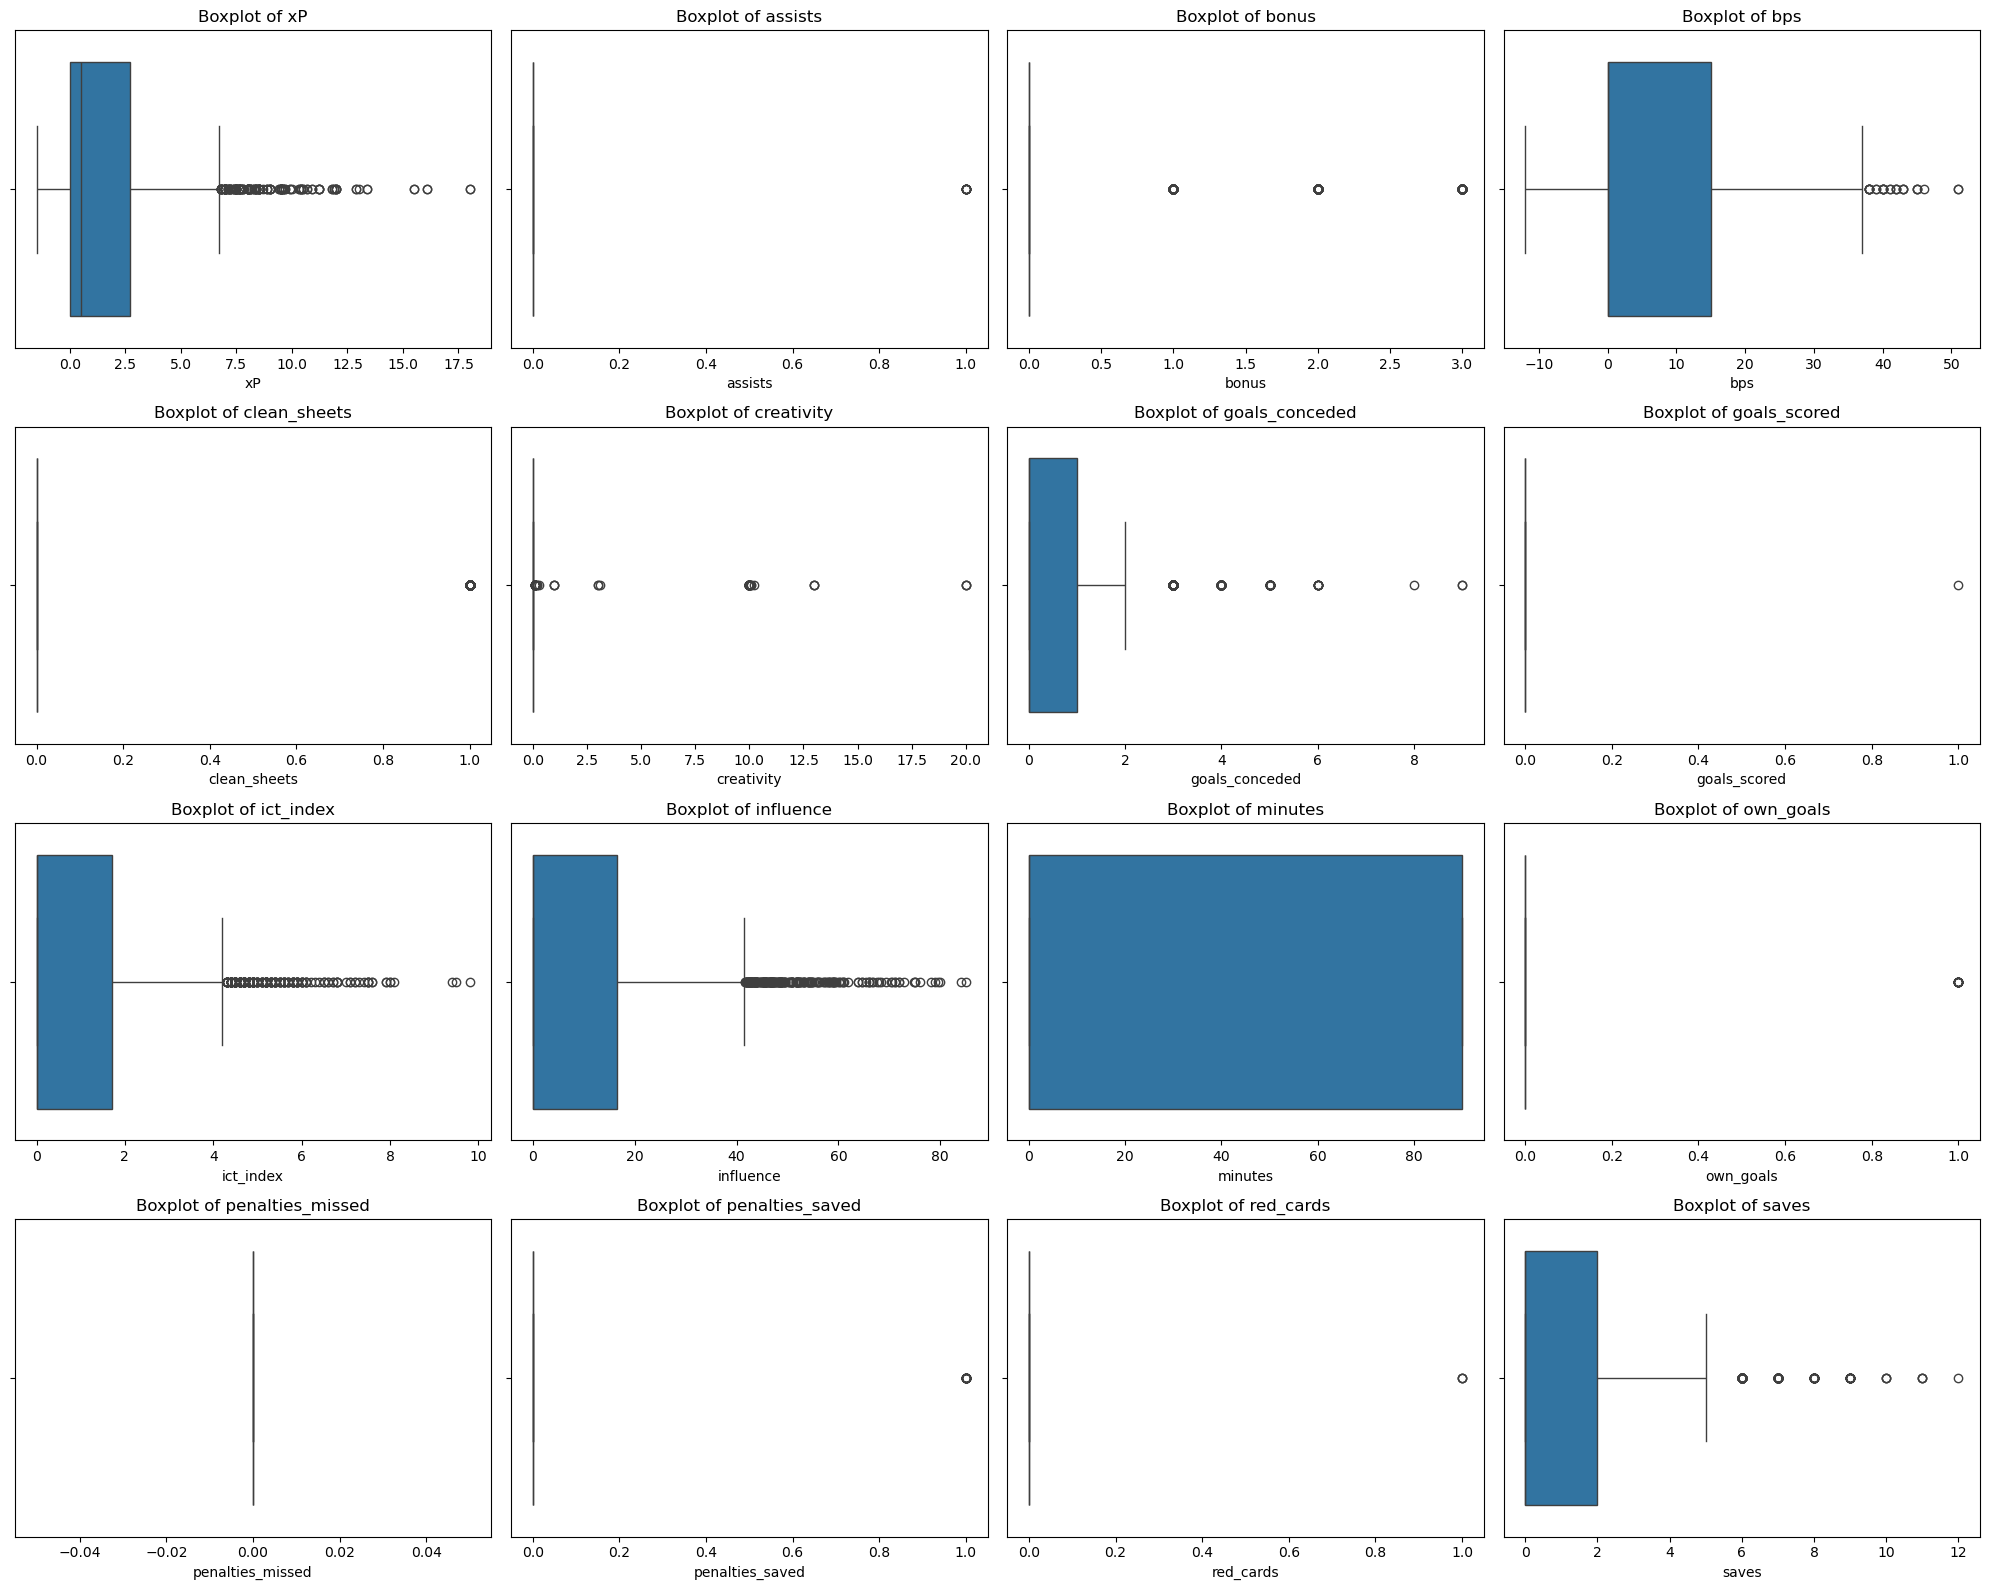

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize the outliers in the Goalkeepers (GK) dataset
plt.figure(figsize=(20, 16))
numeric_columns_gk = df_gk.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each numeric feature
for i, col in enumerate(numeric_columns_gk, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on the number of features
    sns.boxplot(data=df_gk, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Show the plots
plt.show()

In [6]:
df_gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046 entries, 0 to 5045
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        5046 non-null   object 
 1   position                    5046 non-null   object 
 2   team                        5046 non-null   object 
 3   xP                          5046 non-null   float64
 4   assists                     5046 non-null   int64  
 5   bonus                       5046 non-null   int64  
 6   bps                         5046 non-null   int64  
 7   clean_sheets                5046 non-null   int64  
 8   creativity                  5046 non-null   float64
 9   goals_conceded              5046 non-null   int64  
 10  goals_scored                5046 non-null   int64  
 11  ict_index                   5046 non-null   float64
 12  influence                   5046 non-null   float64
 13  kickoff_time                5046 

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = df_gk.drop(columns=[ 'name', 'team', 'kickoff_time', 'position', 'season', 'opponent_team','GW','next_GW_total_points'])  # Drop non-numeric columns and target
y = df_gk['next_GW_total_points']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns

# Sort feature importance
sorted_indices = importances.argsort()[::-1]
important_features = [(features[i], importances[i]) for i in sorted_indices]

# Display feature importance
for feature, importance in important_features:
    print(f"{feature}: {importance:.4f}")

minutes: 0.3121
bps: 0.0892
selected: 0.0743
transfers_balance: 0.0582
xP: 0.0570
transfers_out: 0.0530
transfers_in: 0.0517
expected_goals_conceded: 0.0516
value: 0.0385
influence: 0.0347
fixture_difficulty: 0.0227
team_h_score: 0.0218
ict_index: 0.0210
team_a_score: 0.0178
saves: 0.0146
total_points: 0.0125
starts: 0.0116
expected_assists: 0.0109
expected_goal_involvements: 0.0105
goals_conceded: 0.0099
was_home: 0.0070
assists: 0.0052
creativity: 0.0042
bonus: 0.0040
yellow_cards: 0.0035
expected_goals: 0.0011
clean_sheets: 0.0007
own_goals: 0.0003
penalties_saved: 0.0003
threat: 0.0001
red_cards: 0.0000
goals_scored: 0.0000
penalties_missed: 0.0000


In [9]:
# Exclude non-numeric columns
numeric_columns_gk = df_gk.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns

# Calculate correlation matrix with 'total_points'
correlation_matrix = numeric_columns_gk.corr()

# Sort correlation values with 'total_points'
correlation_with_total_points = correlation_matrix['next_GW_total_points'].sort_values(ascending=False)
print(correlation_with_total_points)

next_GW_total_points          1.000000
minutes                       0.615729
starts                        0.613172
bps                           0.556742
xP                            0.489057
ict_index                     0.479814
influence                     0.479735
saves                         0.463122
total_points                  0.451146
value                         0.445159
expected_goals_conceded       0.418927
goals_conceded                0.371561
selected                      0.363026
clean_sheets                  0.294339
transfers_in                  0.271877
transfers_out                 0.240765
bonus                         0.191149
expected_assists              0.124376
expected_goal_involvements    0.115661
yellow_cards                  0.111924
creativity                    0.099976
assists                       0.094638
transfers_balance             0.080146
expected_goals                0.063014
own_goals                     0.057425
threat                   

In [10]:
# Define the columns to drop
columns_to_drop = [
    'penalties_missed', 'goals_scored', 
    'assists', 'own_goals', 'red_cards', 'yellow_cards','threat', 'creativity', 
    'expected_assists', 'expected_goals', 'expected_goal_involvements', 'bonus','team_a_score','team_h_score','transfers_in','transfers_out'
]

# Drop the columns from the goalkeeper dataset
df_gk_cleaned = df_gk.drop(columns=columns_to_drop)

# Check the updated dataset
print(df_gk_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046 entries, 0 to 5045
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     5046 non-null   object 
 1   position                 5046 non-null   object 
 2   team                     5046 non-null   object 
 3   xP                       5046 non-null   float64
 4   bps                      5046 non-null   int64  
 5   clean_sheets             5046 non-null   int64  
 6   goals_conceded           5046 non-null   int64  
 7   ict_index                5046 non-null   float64
 8   influence                5046 non-null   float64
 9   kickoff_time             5046 non-null   object 
 10  minutes                  5046 non-null   int64  
 11  opponent_team            5046 non-null   object 
 12  penalties_saved          5046 non-null   int64  
 13  saves                    5046 non-null   int64  
 14  selected                

In [11]:
# Ensure that 'kickoff_time' is parsed as a datetime for time-series modeling
df_gk_cleaned['kickoff_time'] = pd.to_datetime(df_gk_cleaned['kickoff_time'])

# Check the new dataset
print(df_gk_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046 entries, 0 to 5045
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   name                     5046 non-null   object             
 1   position                 5046 non-null   object             
 2   team                     5046 non-null   object             
 3   xP                       5046 non-null   float64            
 4   bps                      5046 non-null   int64              
 5   clean_sheets             5046 non-null   int64              
 6   goals_conceded           5046 non-null   int64              
 7   ict_index                5046 non-null   float64            
 8   influence                5046 non-null   float64            
 9   kickoff_time             5046 non-null   datetime64[ns, UTC]
 10  minutes                  5046 non-null   int64              
 11  opponent_team            5046 

In [12]:
# Sort data by player and gameweek
df_gk_final = df_gk_cleaned.sort_values(['name', 'GW'])

# List of features to compute rolling averages
features_to_roll = ['total_points', 'influence','clean_sheets','saves','penalties_saved']

# Rolling averages for 10
for feature in features_to_roll:
    df_gk_final[f'rolling_avg_{feature}_10gw'] = df_gk_cleaned.groupby('name')[feature].transform(lambda x: x.rolling(window=5, min_periods=1).mean())


# Check the new rolling averague columns
print(df_gk_final.head())

             name position           team   xP  bps  clean_sheets  \
0  aaron ramsdale       GK  Sheffield Utd  2.5   12             0   
1  aaron ramsdale       GK  Sheffield Utd  2.0   10             0   
2  aaron ramsdale       GK  Sheffield Utd  2.8   26             0   
3  aaron ramsdale       GK  Sheffield Utd  1.7   13             0   
4  aaron ramsdale       GK  Sheffield Utd  3.3   18             0   

   goals_conceded  ict_index  influence              kickoff_time  ...  \
0               2        1.8       18.2 2020-09-14 17:00:00+00:00  ...   
1               1        1.1       11.2 2020-09-21 17:00:00+00:00  ...   
2               1        5.2       42.0 2020-09-27 11:00:00+00:00  ...   
3               2        2.1       18.6 2020-10-04 13:00:00+00:00  ...   
4               1        2.8       27.8 2020-10-18 11:00:00+00:00  ...   

   expected_goals_conceded starts  fixture_difficulty  GW  \
0                  1.20184      1                  -1   1   
1                 

In [13]:
# Select only numeric columns from the scaled dataframe
numeric_df_gk = df_gk_final.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the scaled data
correlation_matrix = numeric_df_gk.corr()

# Print the correlation matrix in text format
print("Correlation Matrix:")
print(correlation_matrix)

# You can also loop through and print correlation values in a readable format
threshold = 0.8  # You can adjust this threshold
print("\nHighly Correlated Features (correlation > 0.8):")

for col in correlation_matrix.columns:
    for idx, value in correlation_matrix[col].items():
        if abs(value) > threshold and col != idx:
            print(f"Correlation between {col} and {idx}: {value:.2f}")

Correlation Matrix:
                                        xP       bps  clean_sheets  \
xP                                1.000000  0.723530      0.519847   
bps                               0.723530  1.000000      0.672149   
clean_sheets                      0.519847  0.672149      1.000000   
goals_conceded                    0.283498  0.415636     -0.176801   
ict_index                         0.574643  0.855509      0.303013   
influence                         0.574294  0.856450      0.303410   
minutes                           0.708817  0.887314      0.437704   
penalties_saved                   0.119408  0.204808      0.034933   
saves                             0.534323  0.822742      0.267150   
selected                          0.454452  0.460029      0.246416   
total_points                      0.681943  0.912604      0.834579   
transfers_balance                 0.319408  0.160895      0.114540   
value                             0.568140  0.527330      0.333041   


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select the numerical features for VIF calculation
X = df_gk_final.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print(vif_data)

                             Feature         VIF
0                                 xP    5.884486
1                                bps   62.727853
2                       clean_sheets   14.619990
3                     goals_conceded    6.879271
4                          ict_index  237.186755
5                          influence  280.356982
6                            minutes  247.027585
7                    penalties_saved    2.590232
8                              saves   32.665064
9                           selected    2.143206
10                      total_points   41.542885
11                 transfers_balance    1.177833
12                             value    2.072684
13           expected_goals_conceded    4.689151
14                            starts  227.605878
15                fixture_difficulty    1.224059
16              next_GW_total_points    2.170971
17     rolling_avg_total_points_10gw   83.181673
18        rolling_avg_influence_10gw   80.679626
19     rolling_avg_c

In [16]:
# Dropping the chosen features
df_gk_cleaned = df_gk_final.drop(columns=['minutes','influence','ict_index','starts','total_points','rolling_avg_influence_10gw','clean_sheets','penalties_saved'])

# Verifying the cleaned dataframe
print(df_gk_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046 entries, 0 to 5045
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   name                              5046 non-null   object             
 1   position                          5046 non-null   object             
 2   team                              5046 non-null   object             
 3   xP                                5046 non-null   float64            
 4   bps                               5046 non-null   int64              
 5   goals_conceded                    5046 non-null   int64              
 6   kickoff_time                      5046 non-null   datetime64[ns, UTC]
 7   opponent_team                     5046 non-null   object             
 8   saves                             5046 non-null   int64              
 9   selected                          5046 non-null   int64        

In [17]:
# Select only numeric columns from the scaled dataframe
numeric_df_gk = df_gk_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the scaled data
correlation_matrix = numeric_df_gk.corr()

# Print the correlation matrix in text format
print("Correlation Matrix:")
print(correlation_matrix)

# You can also loop through and print correlation values in a readable format
threshold = 0.8  # You can adjust this threshold
print("\nHighly Correlated Features (correlation > 0.8):")

for col in correlation_matrix.columns:
    for idx, value in correlation_matrix[col].items():
        if abs(value) > threshold and col != idx:
            print(f"Correlation between {col} and {idx}: {value:.2f}")

Correlation Matrix:
                                        xP       bps  goals_conceded  \
xP                                1.000000  0.723530        0.283498   
bps                               0.723530  1.000000        0.415636   
goals_conceded                    0.283498  0.415636        1.000000   
saves                             0.534323  0.822742        0.573703   
selected                          0.454452  0.460029        0.308903   
transfers_balance                 0.319408  0.160895        0.074972   
value                             0.568140  0.527330        0.289406   
expected_goals_conceded           0.459319  0.642987        0.734805   
fixture_difficulty                0.173361 -0.034705       -0.188263   
next_GW_total_points              0.489057  0.556742        0.371561   
rolling_avg_total_points_10gw     0.822078  0.807639        0.405117   
rolling_avg_clean_sheets_10gw     0.749478  0.657027        0.192333   
rolling_avg_saves_10gw            0.636959  

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select the numerical features for VIF calculation
X = df_gk_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print(vif_data)

                             Feature        VIF
0                                 xP   5.838863
1                                bps   9.095024
2                     goals_conceded   3.237519
3                              saves   6.799519
4                           selected   2.082369
5                  transfers_balance   1.161650
6                              value   2.053995
7            expected_goals_conceded   4.536630
8                 fixture_difficulty   1.218029
9               next_GW_total_points   2.087581
10     rolling_avg_total_points_10gw  62.560667
11     rolling_avg_clean_sheets_10gw  19.496243
12            rolling_avg_saves_10gw  18.562949
13  rolling_avg_penalties_saved_10gw   1.711936


In [19]:
df_gk_cleaned.head()

,name,position,team,xP,bps,goals_conceded,kickoff_time,opponent_team,saves,selected,...,was_home,season,expected_goals_conceded,fixture_difficulty,GW,next_GW_total_points,rolling_avg_total_points_10gw,rolling_avg_clean_sheets_10gw,rolling_avg_saves_10gw,rolling_avg_penalties_saved_10gw
0,aaron ramsdale,GK,Sheffield Utd,2.5,12,2,2020-09-14 17:00:00+00:00,Wolves,2,462939,...,True,2020-21,1.20184,-1,1,2,1.000000,0.0,2.000000,0.0
1,aaron ramsdale,GK,Sheffield Utd,2.0,10,1,2020-09-21 17:00:00+00:00,Aston Villa,1,440147,...,False,2020-21,0.88200,-1,2,4,1.500000,0.0,1.500000,0.0
2,aaron ramsdale,GK,Sheffield Utd,2.8,26,1,2020-09-27 11:00:00+00:00,Leicester,7,377916,...,True,2020-21,0.56200,-1,3,2,2.333333,0.0,3.333333,0.0
3,aaron ramsdale,GK,Sheffield Utd,1.7,13,2,2020-10-04 13:00:00+00:00,Arsenal,3,335363,...,False,2020-21,0.86384,-1,4,3,2.250000,0.0,3.250000,0.0
4,aaron ramsdale,GK,Sheffield Utd,3.3,18,1,2020-10-18 11:00:00+00:00,Fulham,5,320507,...,True,2020-21,0.93538,0,5,2,2.400000,0.0,3.600000,0.0


In [127]:
df_gk_cleaned.to_csv('df_gk_cleaned.csv', index=False)


In [20]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X_gk = df_gk_cleaned.drop(columns=['next_GW_total_points'])  # Features
y_gk = df_gk_cleaned['next_GW_total_points']  # Target (Total Points)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_gk_scaled = scaler.fit_transform(X_gk.select_dtypes(include=[float, int]))

# Create a DataFrame for scaled features
df_gk_scaled = pd.DataFrame(X_gk_scaled, columns=X_gk.select_dtypes(include=[float, int]).columns)

# Check the scaled data
print(df_gk_scaled.head())

         xP       bps  goals_conceded     saves  selected  transfers_balance  \
0  0.407534  0.468955        1.419134  0.445416  0.133419          -0.040268   
1  0.187271  0.274041        0.452874 -0.078982  0.095594          -1.022410   
2  0.539692  1.833349        0.452874  3.067407 -0.007683          -1.608909   
3  0.055114  0.566412        1.419134  0.969814 -0.078303          -1.122513   
4  0.759954  1.053695        0.452874  2.018611 -0.102958          -0.673702   

      value  expected_goals_conceded  fixture_difficulty  \
0  1.059926                 0.927128           -0.926456   
1  1.059926                 0.523094           -0.926456   
2  1.059926                 0.118857           -0.926456   
3  1.059926                 0.500153           -0.926456   
4  1.059926                 0.590525           -0.140759   

   rolling_avg_total_points_10gw  rolling_avg_clean_sheets_10gw  \
0                      -0.214837                      -0.564246   
1                       

In [21]:
print(df_gk_scaled.columns)

Index(['xP', 'bps', 'goals_conceded', 'saves', 'selected', 'transfers_balance',
       'value', 'expected_goals_conceded', 'fixture_difficulty',
       'rolling_avg_total_points_10gw', 'rolling_avg_clean_sheets_10gw',
       'rolling_avg_saves_10gw', 'rolling_avg_penalties_saved_10gw'],
      dtype='object')


In [22]:
# Add missing columns back to the scaled dataframe from the original cleaned dataframe
df_gk_scaled['name'] = df_gk_cleaned['name']
df_gk_scaled['team'] = df_gk_cleaned['team']
df_gk_scaled['season'] = df_gk_cleaned['season']
df_gk_scaled['kickoff_time'] = df_gk_cleaned['kickoff_time']
df_gk_scaled['next_GW_total_points'] = df_gk_cleaned['next_GW_total_points']
df_gk_scaled['GW'] = df_gk_cleaned['GW']


# Check the updated columns to ensure everything is back
print(df_gk_scaled.columns)

Index(['xP', 'bps', 'goals_conceded', 'saves', 'selected', 'transfers_balance',
       'value', 'expected_goals_conceded', 'fixture_difficulty',
       'rolling_avg_total_points_10gw', 'rolling_avg_clean_sheets_10gw',
       'rolling_avg_saves_10gw', 'rolling_avg_penalties_saved_10gw', 'name',
       'team', 'season', 'kickoff_time', 'next_GW_total_points', 'GW'],
      dtype='object')


In [23]:
# Sort the data by kickoff_time to ensure time order
df_gk_final = df_gk_scaled.sort_values(by='kickoff_time')

# Use 70% of the data for training and 30% for testing
train_size = int(0.7 * len(df_gk_final))

# Split the data into training and test sets
train_data = df_gk_final[:train_size]
test_data = df_gk_final[train_size:]

# Check the split
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

Training set size: 3532
Test set size: 1514


In [24]:
# Alternatively, save them as CSV files
train_data.to_csv('gk_train_data.csv', index=False)
test_data.to_csv('gk_test_data.csv', index=False)

print("Training and test datasets have been saved.")

Training and test datasets have been saved.


In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target
features = ['xP', 'bps', 'goals_conceded', 'saves', 'selected', 'transfers_balance',
       'value', 'expected_goals_conceded', 'fixture_difficulty',
       'rolling_avg_total_points_10gw', 'rolling_avg_clean_sheets_10gw',
       'rolling_avg_saves_10gw', 'rolling_avg_penalties_saved_10gw']

target = 'next_GW_total_points'

# Prepare training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare test data
X_test = test_data[features]
y_test = test_data[target]

# Initialize the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1.923414904770532
MAE: 1.0736465575699443


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost - RMSE: 1.923414904770532, MAE: 1.0736465575699443


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - RMSE: 1.9199370276716292, MAE: 1.1188441215323646


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting - RMSE: 1.9814522056018615, MAE: 1.118222435702281
Ridge Regression - RMSE: 1.849234814546138, MAE: 1.0596859508034016
ElasticNet - RMSE: 1.9162910533643638, MAE: 1.289351816270158


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVR - RMSE: 1.877772725269681, MAE: 0.9057883402282482
KNeighbors - RMSE: 2.0240300121521098, MAE: 1.0874504623513872
Neural Network (MLP) - RMSE: 2.689873953824721, MAE: 1.5321582350219094


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


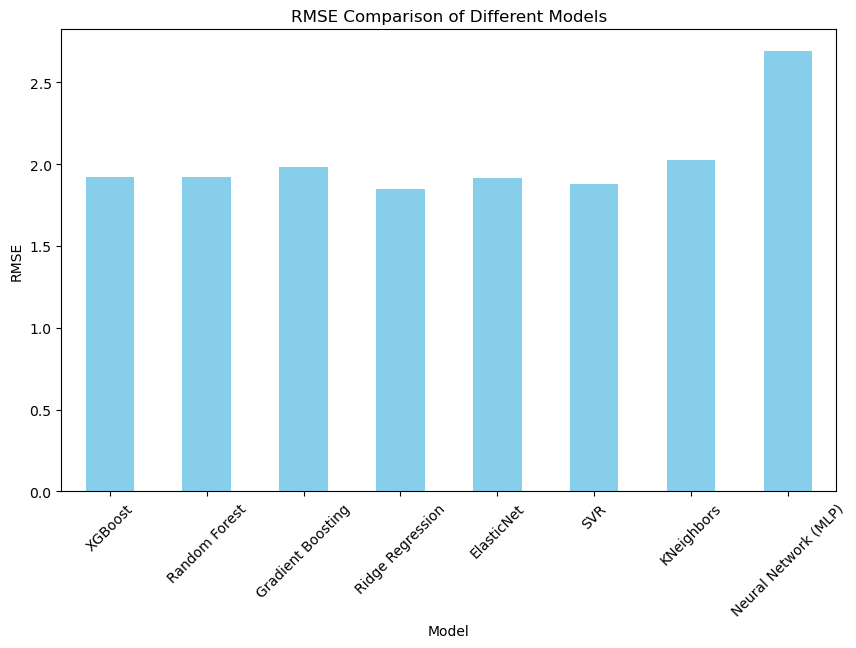

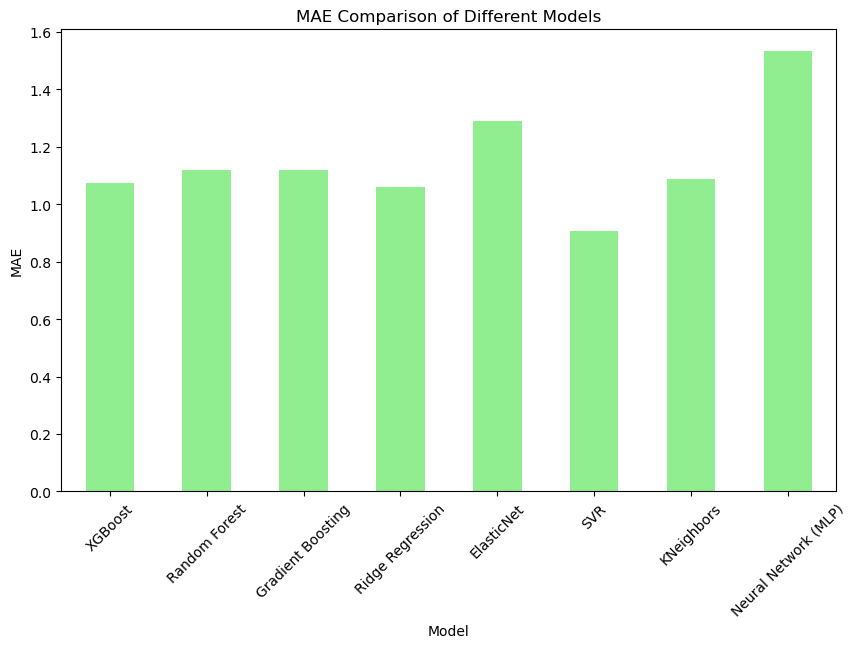

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Define features and target
features = ['xP', 'bps', 'goals_conceded', 'saves', 'selected', 'transfers_balance',
            'value', 'expected_goals_conceded', 'fixture_difficulty',
            'rolling_avg_total_points_10gw', 'rolling_avg_clean_sheets_10gw',
            'rolling_avg_saves_10gw', 'rolling_avg_penalties_saved_10gw']

target = 'next_GW_total_points'

# Prepare training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare test data
X_test = test_data[features]
y_test = test_data[target]

# Initialize and evaluate each model
models = {
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "Ridge Regression": Ridge(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

# Dictionary to store RMSE and MAE for each model
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[model_name] = {'RMSE': rmse, 'MAE': mae}
    print(f"{model_name} - RMSE: {rmse}, MAE: {mae}")

# Convert the results into a DataFrame for easy visualization
results_df = pd.DataFrame(results).T

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
results_df['RMSE'].plot(kind='bar', color='skyblue')
plt.title('RMSE Comparison of Different Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot MAE comparison
plt.figure(figsize=(10, 6))
results_df['MAE'].plot(kind='bar', color='lightgreen')
plt.title('MAE Comparison of Different Models')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


In [28]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Remove prediction-related columns if they exist in the dataset
if 'Predicted' in test_data.columns:
    test_data = test_data.drop(columns=['Predicted'])


# Define a threshold to split players into high and low scorers (e.g., threshold = 6)
threshold = 6

# Split the data into high and low scoring players
high_scorers_train = train_data[train_data['next_GW_total_points'] >= threshold]
low_scorers_train = train_data[train_data['next_GW_total_points'] < threshold]

high_scorers_test = test_data[test_data['next_GW_total_points'] >= threshold]
low_scorers_test = test_data[test_data['next_GW_total_points'] < threshold]

# Define Bayesian Optimization search space (you can adjust this based on your specific needs)
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (100, 1000),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 1),
    'reg_alpha': (0, 10),
    'reg_lambda': (0.1, 10),
    'min_child_weight': (1, 10)
}

# Define X_train and y_train for high and low scorers
X_train_high = high_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_high = high_scorers_train['next_GW_total_points']

X_train_low = low_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_low = low_scorers_train['next_GW_total_points']

X_test_high = high_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_high = high_scorers_test['next_GW_total_points']

X_test_low = low_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_low = low_scorers_test['next_GW_total_points']

# Bayesian optimization for high scorers model
opt_high = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_high.fit(X_train_high, y_train_high)
best_params_high = opt_high.best_params_
print("Best parameters for high scorers model: ", best_params_high)

# Bayesian optimization for low scorers model
opt_low = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_low.fit(X_train_low, y_train_low)
best_params_low = opt_low.best_params_
print("Best parameters for low scorers model: ", best_params_low)

# Re-train the high and low scorers models with the best parameters
best_xgb_high = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)
best_xgb_high.fit(X_train_high, y_train_high)

best_xgb_low = XGBRegressor(**best_params_low, objective='reg:squarederror', random_state=42)
best_xgb_low.fit(X_train_low, y_train_low)

# Make predictions for high and low scorers
y_pred_high = best_xgb_high.predict(X_test_high)
y_pred_low = best_xgb_low.predict(X_test_low)

# Combine predictions
test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),
                                    pd.Series(y_pred_low, index=low_scorers_test.index)])

# Calculate RMSE for the combined model
y_test_combined = pd.concat([y_test_high, y_test_low])
y_pred_combined = test_data['Predicted']
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test_combined) ** 2))
print(f'Combined Model Test RMSE: {rmse_combined}')

#Cross-Validation Scores (5-fold cross-validation)
cv_scores = cross_val_score(best_xgb_high, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE scores: {-cv_scores}")
print(f"Average Cross-Validation RMSE: {-cv_scores.mean()}")

#Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

#R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Show actual vs predicted for top players
top_players_combined = test_data.groupby('name').agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10)
print(top_players_combined)

# Plot actual vs predicted for top players
top_players_combined.plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Total Points for Top Players (Combined Model)')
plt.ylabel('Points')
plt.show()

Best parameters for high scorers model:  OrderedDict([('colsample_bytree', 0.5), ('gamma', 0), ('learning_rate', 0.01), ('max_depth', 5), ('min_child_weight', 8), ('n_estimators', 100), ('reg_alpha', 0), ('reg_lambda', 0.1), ('subsample', 0.8057054257374714)])
Best parameters for low scorers model:  OrderedDict([('colsample_bytree', 0.5), ('gamma', 1), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 2), ('n_estimators', 1000), ('reg_alpha', 10), ('reg_lambda', 0.1), ('subsample', 1.0)])
Combined Model Test RMSE: 0.9188180895336797


NameError: name 'best_xgb' is not defined

In [139]:
# Save the trained models using joblib
joblib.dump(best_xgb_high, 'gk_xgb_high_model.pkl')
joblib.dump(best_xgb_low, 'gk_xgb_low_model.pkl')

NameError: name 'joblib' is not defined

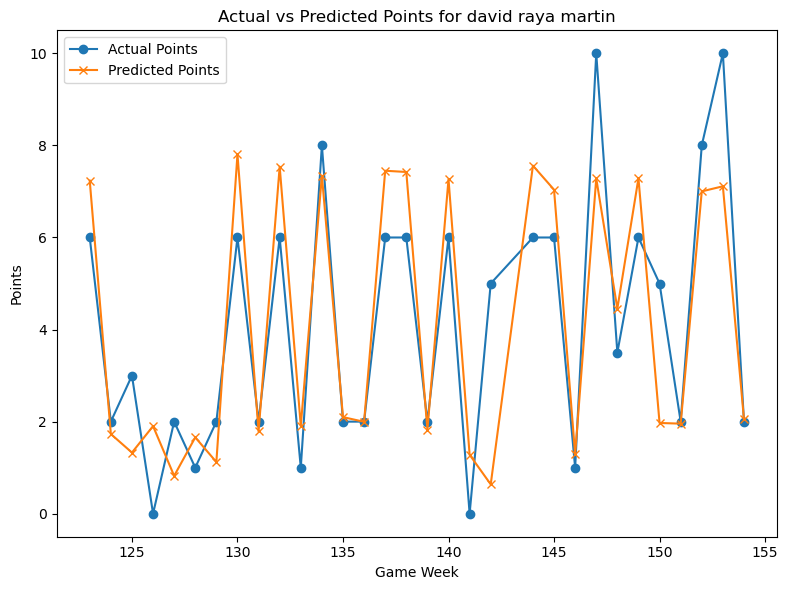

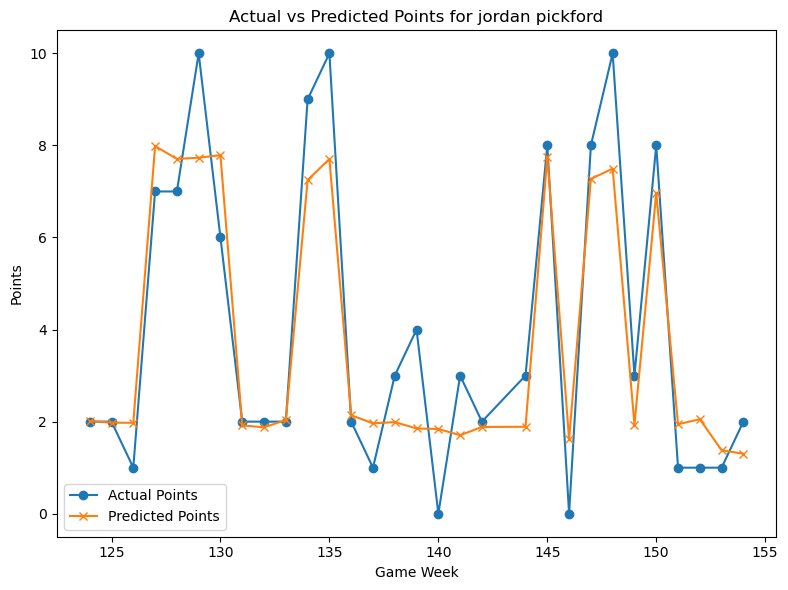

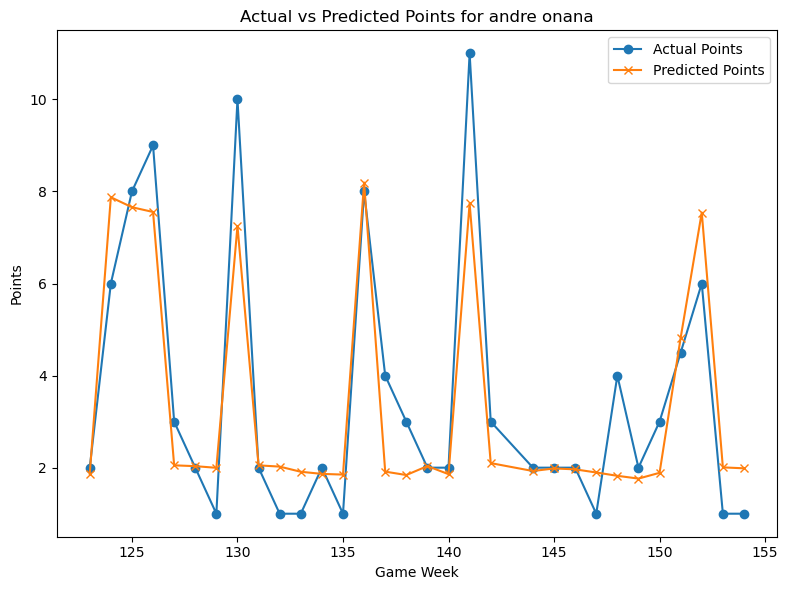

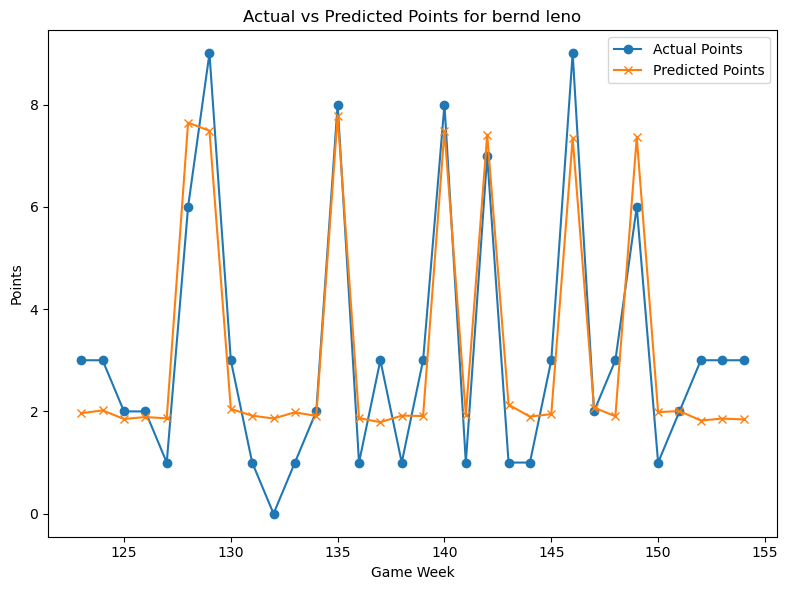

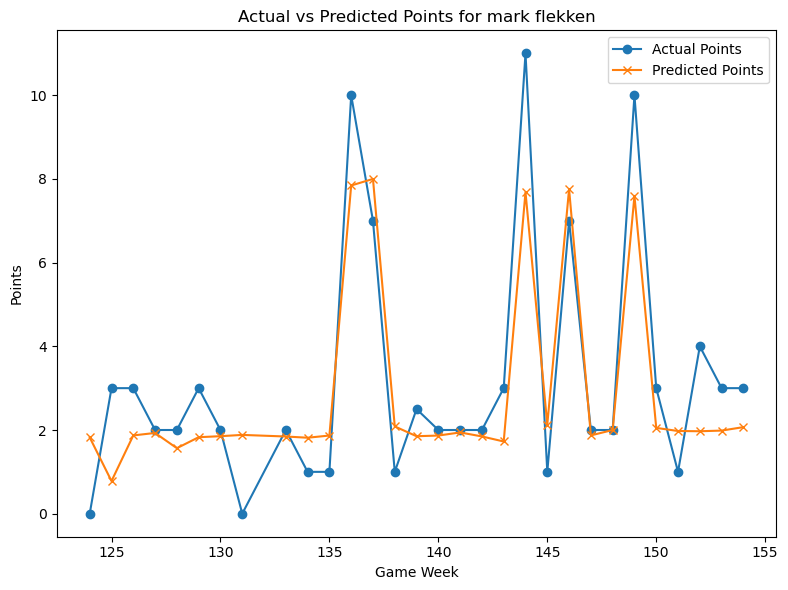

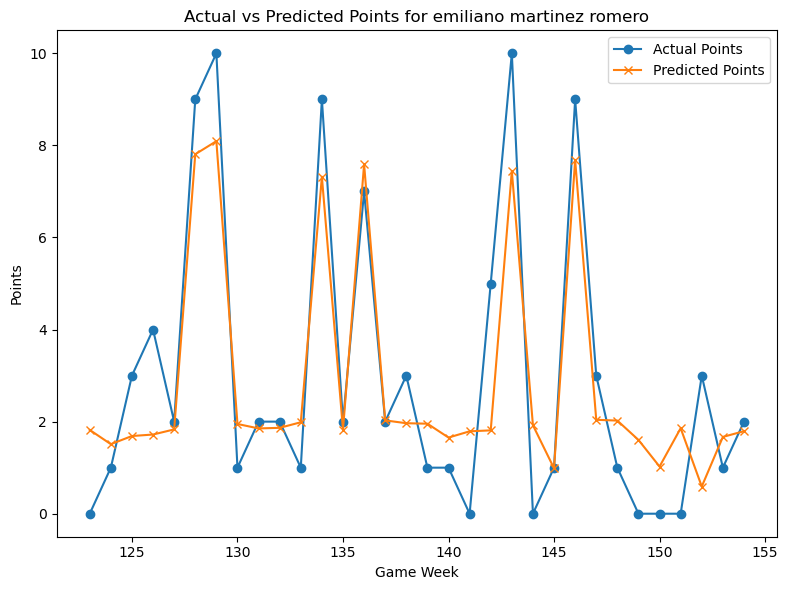

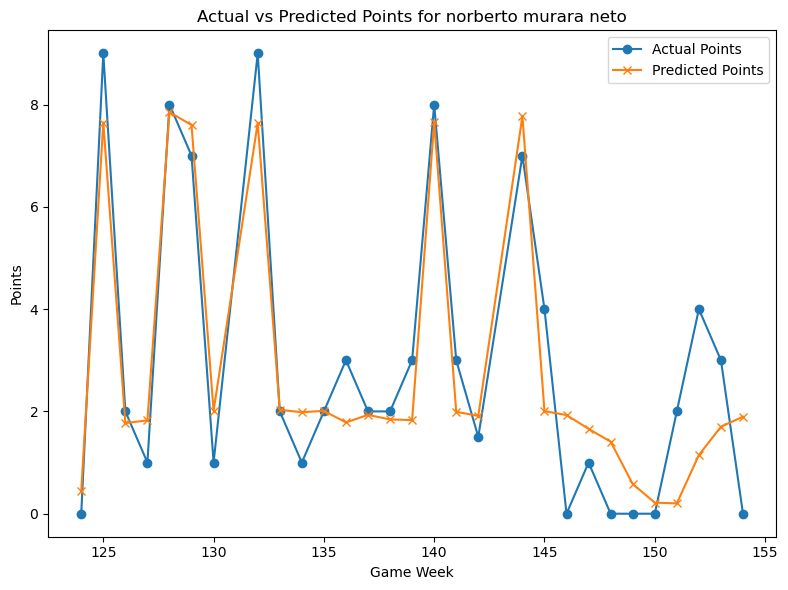

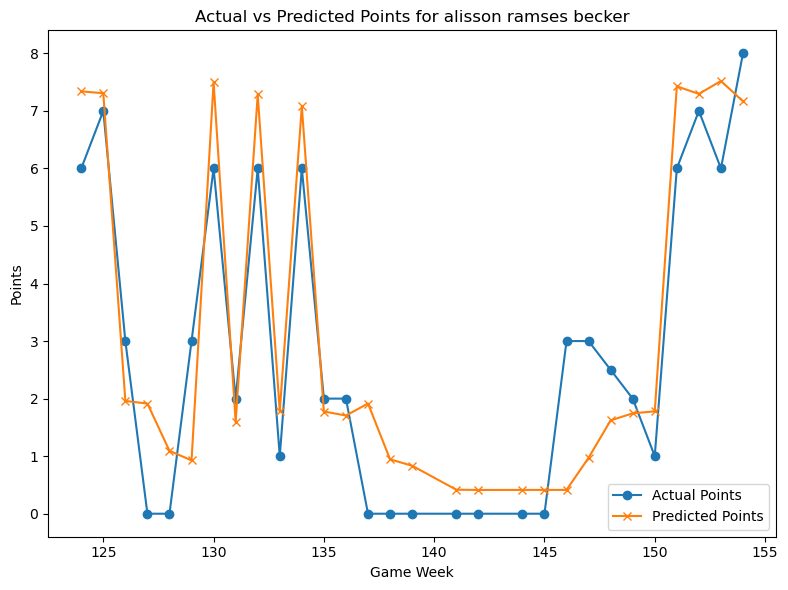

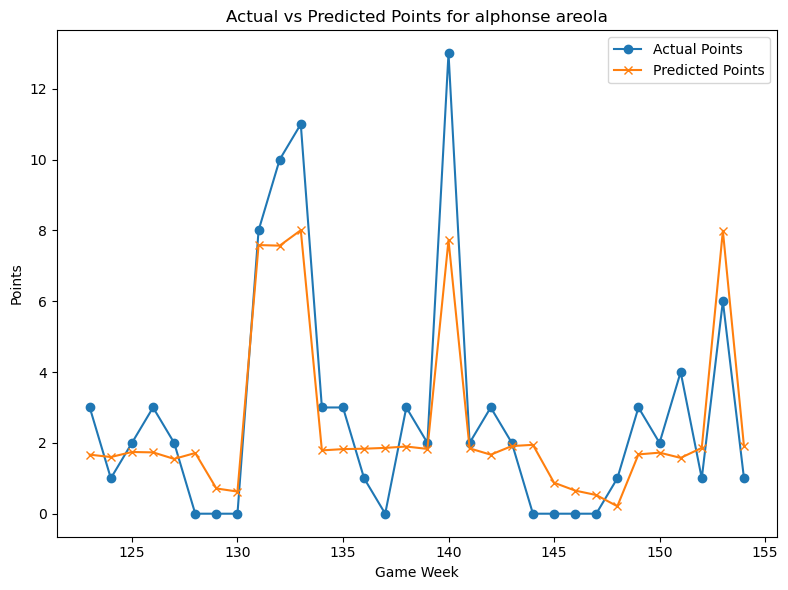

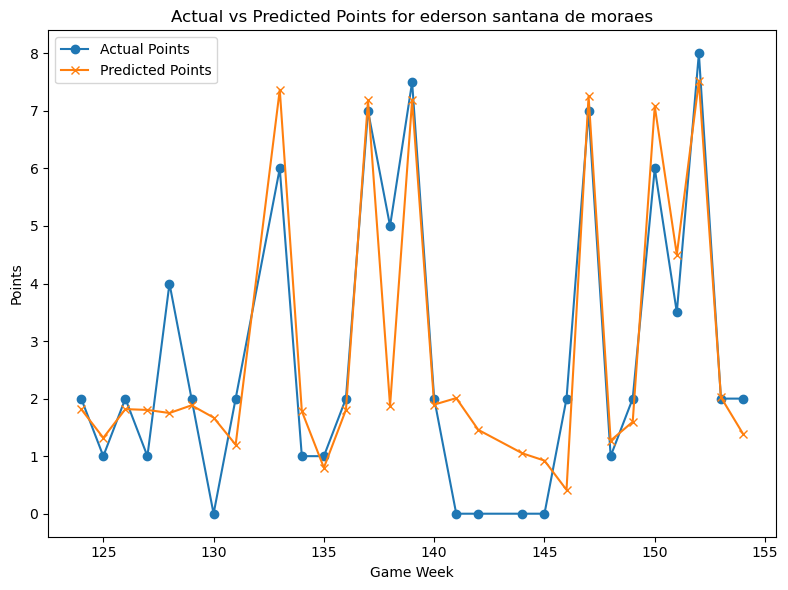

In [29]:
import matplotlib.pyplot as plt

# Group by game week and player, then calculate the average actual and predicted points
gw_performance = test_data.groupby(['GW', 'name']).agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).reset_index()

# Get the top players by their actual total points
top_players_gws = gw_performance.groupby('name').agg({'next_GW_total_points': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10).index

# Filter the performance for these top players
top_gw_performance = gw_performance[gw_performance['name'].isin(top_players_gws)]

# Create a separate plot for each player
for player in top_players_gws:
    player_data = top_gw_performance[top_gw_performance['name'] == player]
    plt.figure(figsize=(8, 6))
    plt.plot(player_data['GW'], player_data['next_GW_total_points'], label=f'Actual Points', marker='o')
    plt.plot(player_data['GW'], player_data['Predicted'], label=f'Predicted Points', marker='x')
    plt.title(f'Actual vs Predicted Points for {player}')
    plt.xlabel('Game Week')
    plt.ylabel('Points')
    plt.legend()
    plt.tight_layout()
    plt.show()

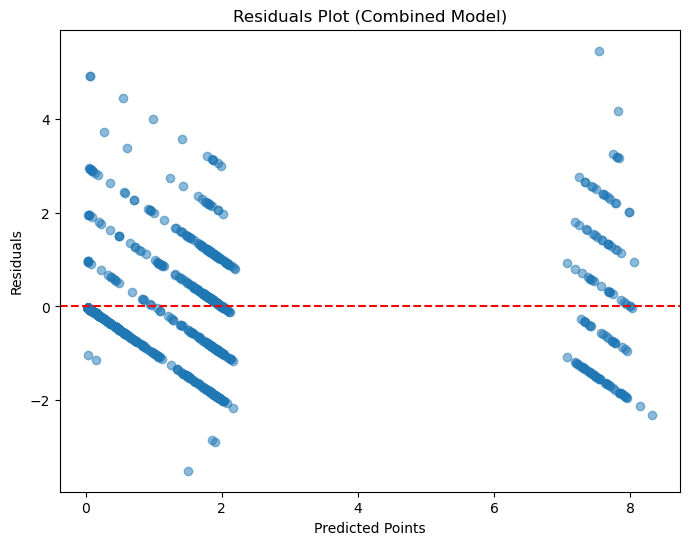

In [148]:
# Calculate residuals (actual - predicted)
test_data['Residuals'] = test_data['next_GW_total_points'] - test_data['Predicted']

# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(test_data['Predicted'], test_data['Residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot (Combined Model)')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.show()

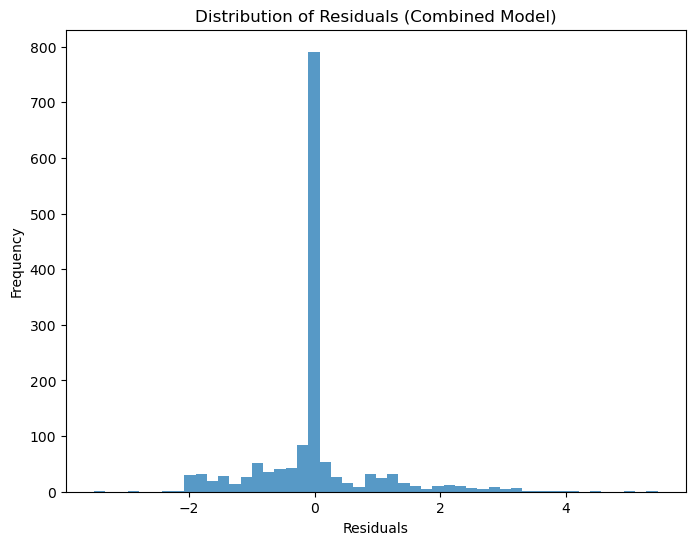

In [149]:
# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(test_data['Residuals'], bins=50, alpha=0.75)
plt.title('Distribution of Residuals (Combined Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

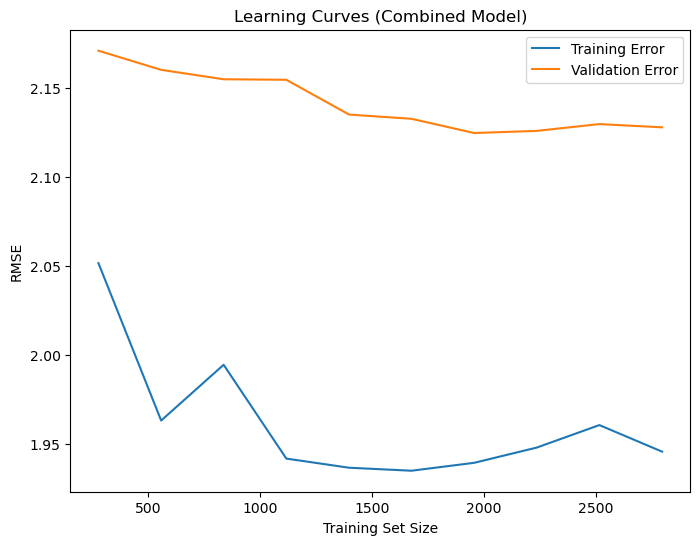

In [150]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize the best_xgb model (assumes that best_params_high or best_params_low is already defined)
best_xgb = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)

# Train the model with all training data (if not done already)
best_xgb.fit(X_train, y_train)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.sqrt(train_scores_mean), label='Training Error')
plt.plot(train_sizes, np.sqrt(test_scores_mean), label='Validation Error')
plt.title('Learning Curves (Combined Model)')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [30]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb)
plt.title('Feature Importance goalkeeper (Combined Model)')
plt.show()

NameError: name 'best_xgb' is not defined

<Figure size 1000x800 with 0 Axes>

In [137]:
import shap

# Create a TreeExplainer for your XGBoost model
explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the same dataset (X_train) you're using
shap_values = explainer.shap_values(X_train)

# Generate SHAP dot plot (beeswarm plot)
shap.summary_plot(shap_values, X_train, plot_type="dot", show=False)

# Customize and display the plot
plt.title("SHAP Summary Plot: Feature Impact (Goalkeeper Model)")
plt.tight_layout()
plt.show()

NameError: name 'best_xgb' is not defined

In [96]:
import joblib

# Save the model using joblib
joblib.dump(best_xgb, "best_xgboost_GKmodel.pkl")

['best_xgboost_GKmodel.pkl']